In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
!pip install geopandas

In [3]:
pip install pingouin

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler

# Load the dataset
file_path =  r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info to check for issues
data_info = data.info()
data_head = data.head()
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

data_info, data_head, missing_values, duplicate_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           11588 non-null  float64
 1   Y           11588 non-null  float64
 2   FID         11588 non-null  int64  
 3   datetime    11588 non-null  object 
 4   siteid      11588 non-null  object 
 5   tc_cfu      11588 non-null  int64  
 6   ec_cfu      11588 non-null  int64  
 7   tc_mpn      11588 non-null  int64  
 8   ec_mpn      11588 non-null  int64  
 9   p_ecc_cfu   11588 non-null  int64  
 10  fs_cfu      11588 non-null  int64  
 11  temp        11588 non-null  float64
 12  ph          11588 non-null  float64
 13  cond        11588 non-null  float64
 14  do          11588 non-null  float64
 15  dopc        11588 non-null  float64
 16  phosphate_  11588 non-null  float64
 17  salinity    11588 non-null  float64
 18  clost_perf  11588 non-null  int64  
 19  ammonium_n  11588 non-nul

(None,
                X             Y  FID                datetime siteid  tc_cfu  \
 0 -292611.743913  6.698558e+06    1  2013/09/12 10:18:00+01     r4       0   
 1 -284290.031922  6.696286e+06    2  2013/09/12 11:51:00+01     r8       0   
 2 -284290.031922  6.696286e+06    3  2013/10/14 11:15:00+01     r8       0   
 3 -283531.517179  6.702055e+06    4  2013/10/14 11:40:00+01    r17       0   
 4 -293739.717388  6.708986e+06    5  2013/10/14 13:00:00+01     r3   20100   
 
    ec_cfu  tc_mpn  ec_mpn  p_ecc_cfu  ...  fcoliforms  salmonella  bod  cod  \
 0       0       0       0          0  ...           0           0    0    0   
 1       0       0       0          0  ...           0           0    0    0   
 2       0       0       0          0  ...           0           0    0    0   
 3       0       0       0          0  ...           0           0    0    0   
 4       0       0       0          0  ...        6200           0    0    0   
 
    sussolids    id         sitenam

In [5]:
import pandas as pd

file_path = r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

print(data.head())

               X             Y  FID                datetime siteid  tc_cfu  \
0 -292611.743913  6.698558e+06    1  2013/09/12 10:18:00+01     r4       0   
1 -284290.031922  6.696286e+06    2  2013/09/12 11:51:00+01     r8       0   
2 -284290.031922  6.696286e+06    3  2013/10/14 11:15:00+01     r8       0   
3 -283531.517179  6.702055e+06    4  2013/10/14 11:40:00+01    r17       0   
4 -293739.717388  6.708986e+06    5  2013/10/14 13:00:00+01     r3   20100   

   ec_cfu  tc_mpn  ec_mpn  p_ecc_cfu  ...  fcoliforms  salmonella  bod  cod  \
0       0       0       0          0  ...           0           0    0    0   
1       0       0       0          0  ...           0           0    0    0   
2       0       0       0          0  ...           0           0    0    0   
3       0       0       0          0  ...           0           0    0    0   
4       0       0       0          0  ...        6200           0    0    0   

   sussolids    id         sitename              river  

# Data Cleaning and Preprocessing

In [6]:
# Step 1: Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
# Step 2: Check and remove duplicate rows
data.drop_duplicates(inplace=True)

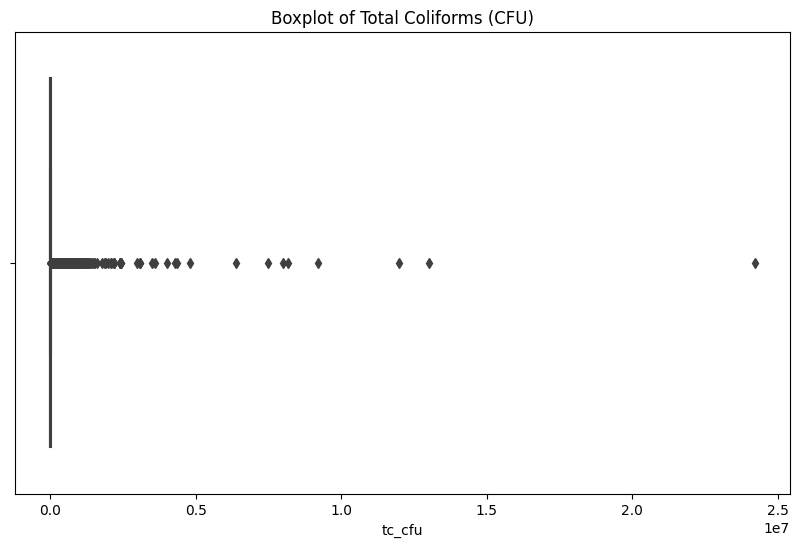

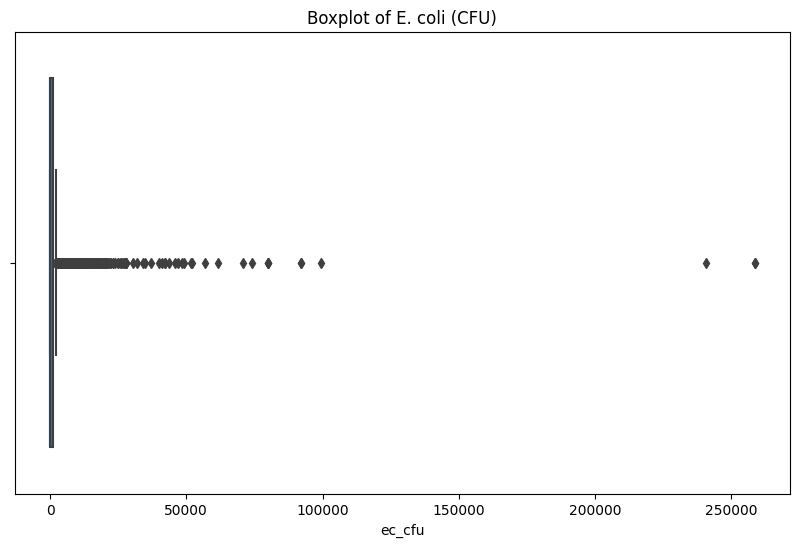

In [8]:
# Step 3: Outlier Detection (Example with 'tc_cfu')
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['tc_cfu'])
plt.title('Boxplot of Total Coliforms (CFU)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ec_cfu'])
plt.title('Boxplot of E. coli (CFU)')
plt.show()

In [9]:
# Remove obvious data entry errors
data = data[(data['tc_cfu'] >= 0) & (data['ec_cfu'] >= 0)]

# Apply log transformation to CFU columns
data['tc_cfu_log'] = np.log1p(data['tc_cfu'])  # Log transformation with log1p to handle zeros
data['ec_cfu_log'] = np.log1p(data['ec_cfu'])

# Outlier removal based on thresholds
tc_cfu_threshold = 1e6  # Example threshold for Total Coliforms (CFU)
ec_cfu_threshold = 1e5  # Example threshold for E. coli (CFU)
data = data[(data['tc_cfu'] < tc_cfu_threshold) & (data['ec_cfu'] < ec_cfu_threshold)]

# Apply Robust Scaling if needed before using a robust model
columns_to_scale = ['tc_cfu_log', 'ec_cfu_log']
scaler = RobustScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the cleaned and transformed data to a new CSV file
try:
    data.to_csv('transformed_water_quality.csv', index=False)
except PermissionError:
    print("Permission denied: Unable to save the file. Try closing the file if it's open elsewhere or save it to a different location.")

              tc_cfu        ec_cfu    tc_cfu_log    ec_cfu_log
count   11509.000000  11509.000000  11509.000000  11509.000000
mean    29250.103137   1132.501260     -0.249512     -0.136063
std     91044.631408   3681.178105      1.184105      0.511284
min         0.000000      0.000000     -2.883067     -0.663020
25%       900.000000      0.000000     -0.518194     -0.663020
50%      4000.000000     90.000000      0.000000      0.000000
75%     16000.000000    900.000000      0.481806      0.336980
max    980000.000000  99315.000000      1.912130      1.028176


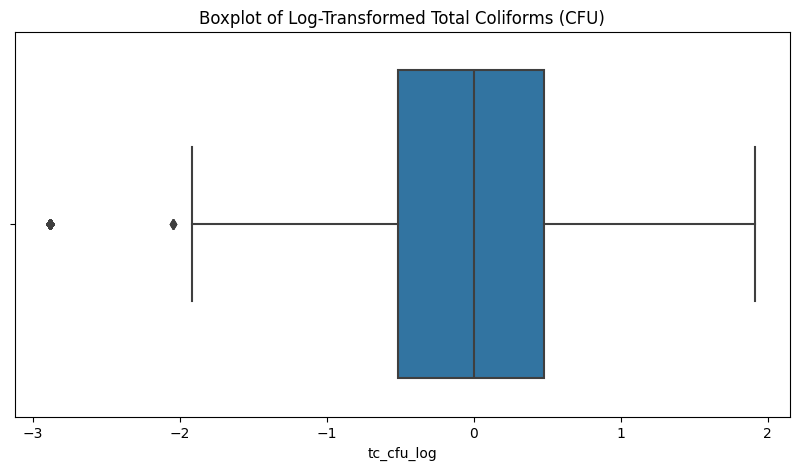

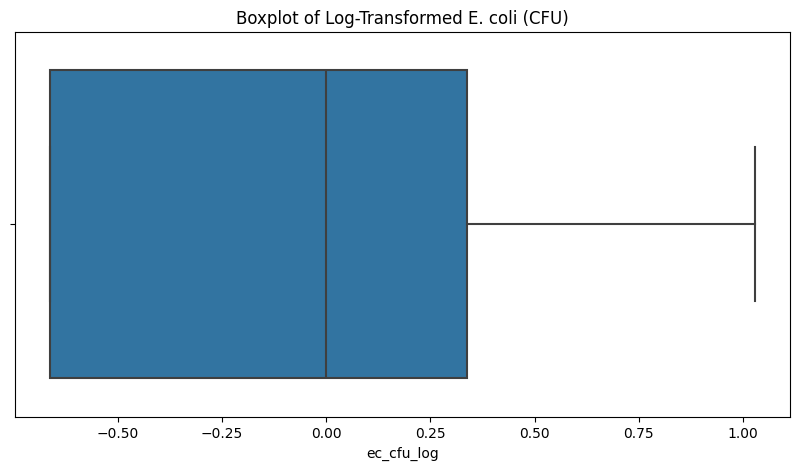

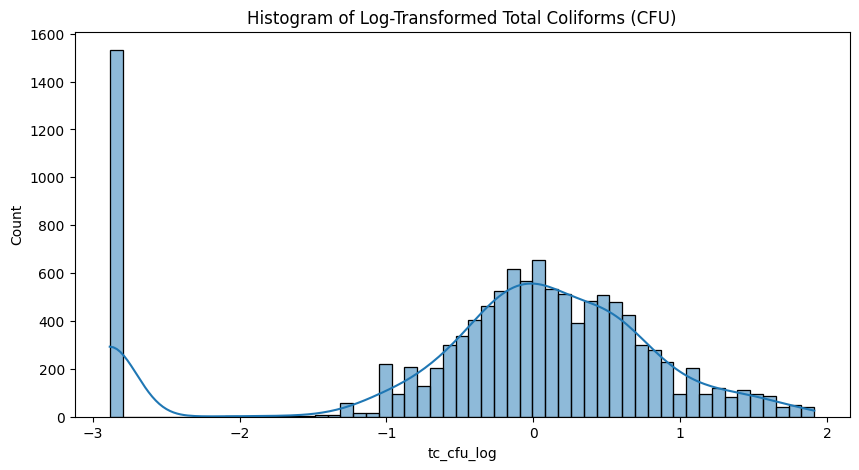

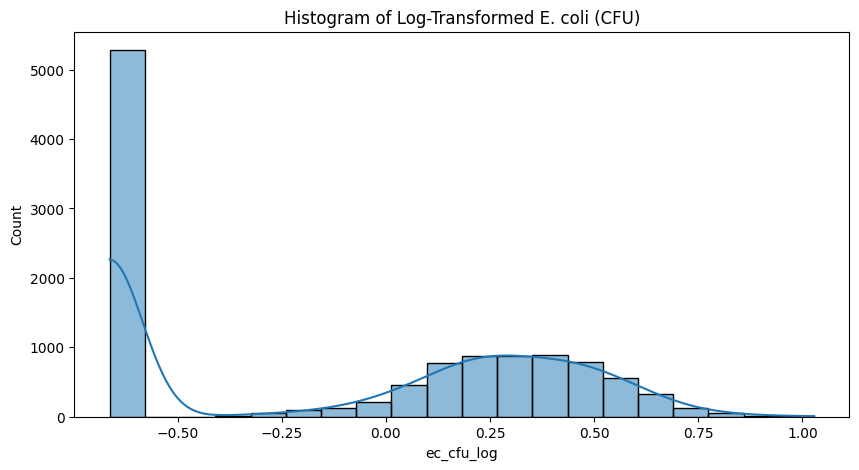

In [10]:
# Summary statistics of the original and transformed columns
print(data[['tc_cfu', 'ec_cfu', 'tc_cfu_log', 'ec_cfu_log']].describe())
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for log-transformed Total Coliforms (CFU)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['tc_cfu_log'])
plt.title('Boxplot of Log-Transformed Total Coliforms (CFU)')
plt.show()

# Boxplot for log-transformed E. coli (CFU)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['ec_cfu_log'])
plt.title('Boxplot of Log-Transformed E. coli (CFU)')
plt.show()

# Histograms for log-transformed data
plt.figure(figsize=(10, 5))
sns.histplot(data['tc_cfu_log'], kde=True)
plt.title('Histogram of Log-Transformed Total Coliforms (CFU)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['ec_cfu_log'], kde=True)
plt.title('Histogram of Log-Transformed E. coli (CFU)')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Loading the original dataset
original_data = pd.read_csv(r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv')

# Defining parameters to keep original
parameters_to_keep_original = ['ec_cfu', 'tc_cfu', 'temp', 'ph', 'do', 'phosphate_']

# Clean pH and DO
def clean_ph(ph):
    if 2 <= ph <= 14:
        return ph
    else:
        return np.nan

def clean_do(do):
    if 0 < do <= 20:
        return do
    else:
        return np.nan

# Clean temperature
def clean_temp(temp):
    upper_limit = 40  # Set upper limit to 40°C
    if 0 <= temp <= upper_limit:
        return temp
    else:
        return np.nan

original_data['ph'] = original_data['ph'].apply(clean_ph)
original_data['do'] = original_data['do'].apply(clean_do)
original_data['temp'] = original_data['temp'].apply(clean_temp)

# Handle missing values
original_data['ph'] = original_data['ph'].fillna(original_data['ph'].median())
original_data['do'] = original_data['do'].fillna(original_data['do'].median())
original_data['temp'] = original_data['temp'].fillna(original_data['temp'].median())

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['siteid', 'sitename', 'river']
for col in categorical_columns:
    original_data[col] = encoder.fit_transform(original_data[col].astype(str))

# Scale numerical features, excluding the parameters to keep original
scaler = MinMaxScaler()
columns_to_scale = original_data.select_dtypes(include=['float64', 'int64']).columns
columns_to_scale = [col for col in columns_to_scale if col not in parameters_to_keep_original]

# Create a new DataFrame with scaled values
scaled_data = original_data.copy()
scaled_data[columns_to_scale] = scaler.fit_transform(original_data[columns_to_scale])

# Save the correctly preprocessed data
cleaned_file_path = 'final_cleaned_surface_water_quality.csv'
scaled_data.to_csv(cleaned_file_path, index=False)

# Display the first few rows of the cleaned dataset
print(scaled_data.head())

# Check the ranges of parameters kept original
for param in parameters_to_keep_original:
    print(f"{param} range:", scaled_data[param].min(), "-", scaled_data[param].max())

# Print summary statistics for parameters kept original
for param in parameters_to_keep_original:
    print(f"\n{param} summary statistics:")
    print(scaled_data[param].describe())

# Print the number of temperature values cleaned
original_temp_count = len(original_data)
cleaned_temp_count = scaled_data['temp'].notna().sum()
print(f"\nNumber of temperature values cleaned: {original_temp_count - cleaned_temp_count}")

          X         Y       FID                datetime  siteid  tc_cfu  \
0  0.306813  0.239483  0.000000  2013/09/12 10:18:00+01      32       0   
1  0.863055  0.116964  0.000086  2013/09/12 11:51:00+01      40       0   
2  0.863055  0.116964  0.000173  2013/10/14 11:15:00+01      40       0   
3  0.913756  0.428057  0.000259  2013/10/14 11:40:00+01      26       0   
4  0.231417  0.801898  0.000345  2013/10/14 13:00:00+01      29   20100   

   ec_cfu  tc_mpn  ec_mpn  p_ecc_cfu  ...  fcoliforms  salmonella  bod  cod  \
0       0     0.0     0.0        0.0  ...     0.00000         0.0  0.0  0.0   
1       0     0.0     0.0        0.0  ...     0.00000         0.0  0.0  0.0   
2       0     0.0     0.0        0.0  ...     0.00000         0.0  0.0  0.0   
3       0     0.0     0.0        0.0  ...     0.00000         0.0  0.0  0.0   
4       0     0.0     0.0        0.0  ...     0.00155         0.0  0.0  0.0   

   sussolids        id  sitename  river  total_coli  total_ecol  
0       

# Descriptive Statistics

In [12]:
import pandas as pd

# Load the cleaned data
cleaned_file_path = 'final_cleaned_surface_water_quality.csv'
data = pd.read_csv(cleaned_file_path)

# Generate descriptive statistics for the entire dataset
descriptive_stats = data.describe()

# Display the descriptive statistics
print(descriptive_stats)

# Exclude non-numeric columns from median and mode calculations
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate medians
medians = data[numeric_cols].median()

# Calculate modes
modes = data[numeric_cols].mode().iloc[0]  # Mode can have multiple values, so we take the first row

# Display the additional statisticsimport pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

                  X             Y           FID        siteid        tc_cfu  \
count  11588.000000  11588.000000  11588.000000  11588.000000  1.158800e+04   
mean       0.569244      0.415176      0.500000     15.374871  4.720139e+04   
std        0.196807      0.185693      0.288713     11.944774  3.668235e+05   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.457459      0.357329      0.250000      6.000000  9.500000e+02   
50%        0.545654      0.380366      0.500000     11.000000  4.000000e+03   
75%        0.609099      0.422069      0.750000     24.000000  1.700000e+04   
max        1.000000      1.000000      1.000000     42.000000  2.420000e+07   

              ec_cfu        tc_mpn        ec_mpn     p_ecc_cfu        fs_cfu  \
count   11588.000000  11588.000000  11588.000000  11588.000000  11588.000000   
mean     1190.180963      0.004386      0.002641      0.002845      0.000161   
std      5464.187916      0.037754      0.032611

# Exploratory Data Analysis

 ## Temporal Analysis

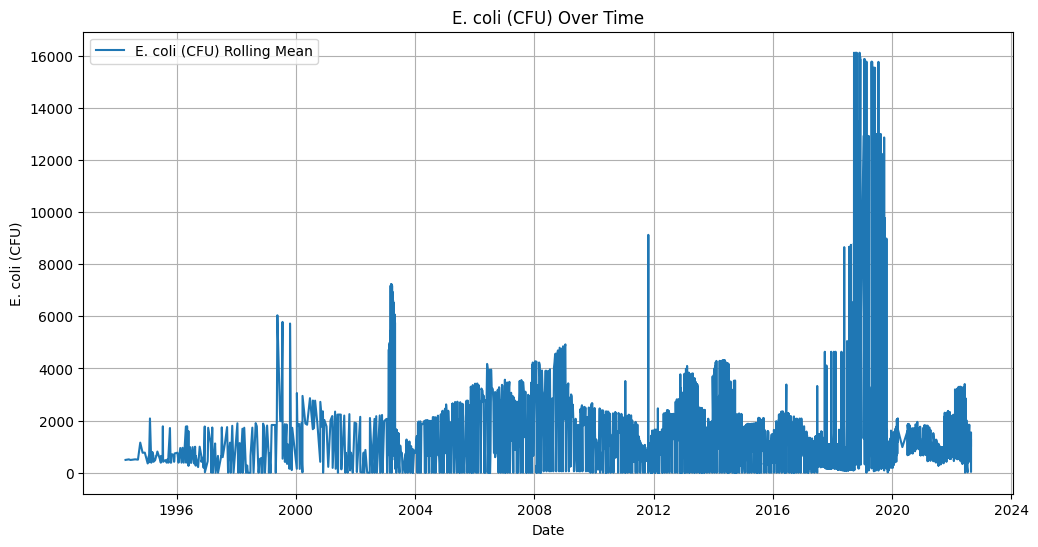

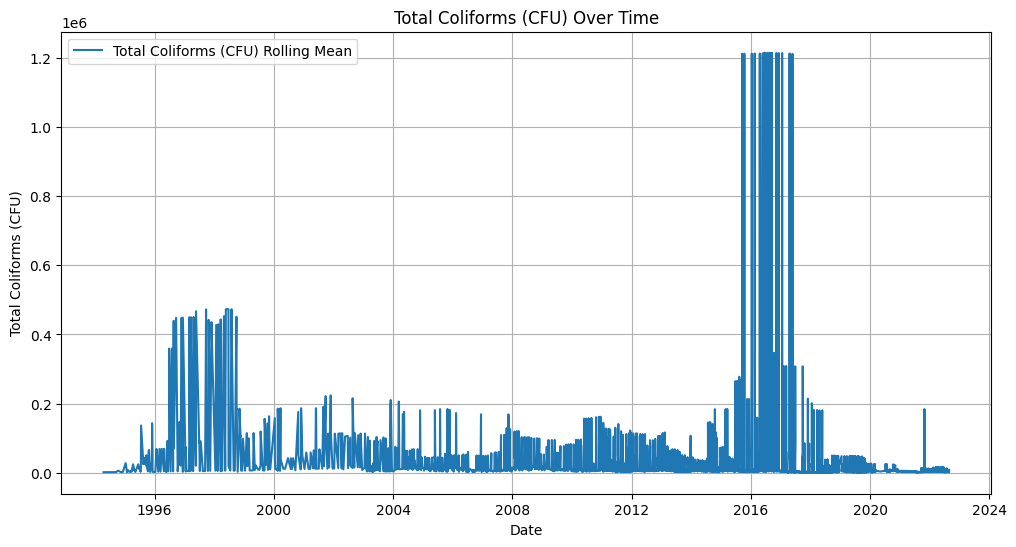

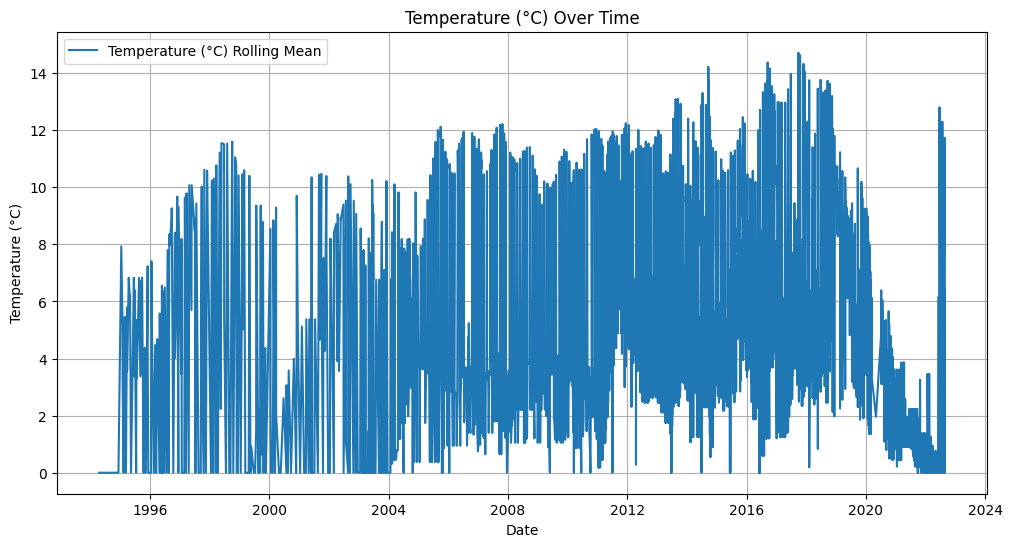

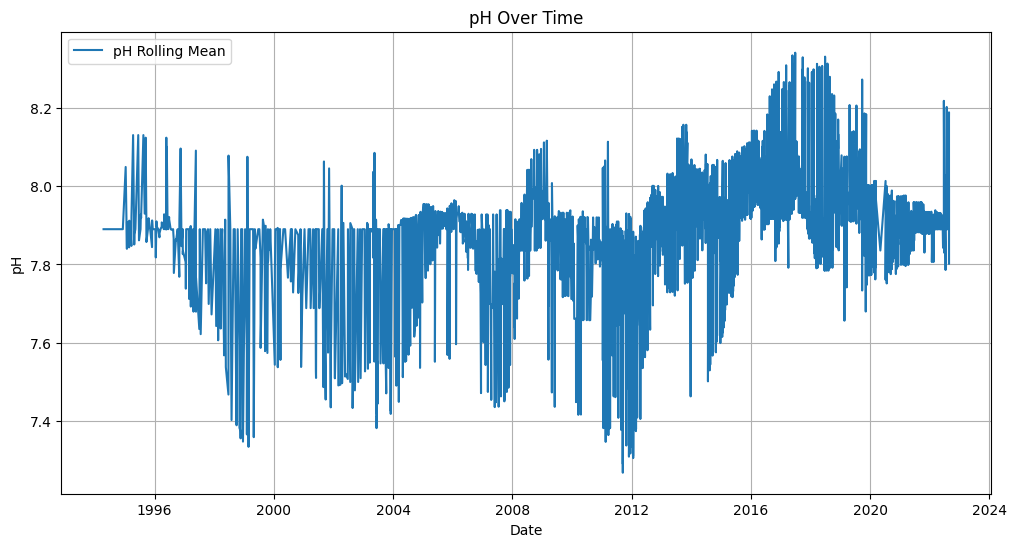

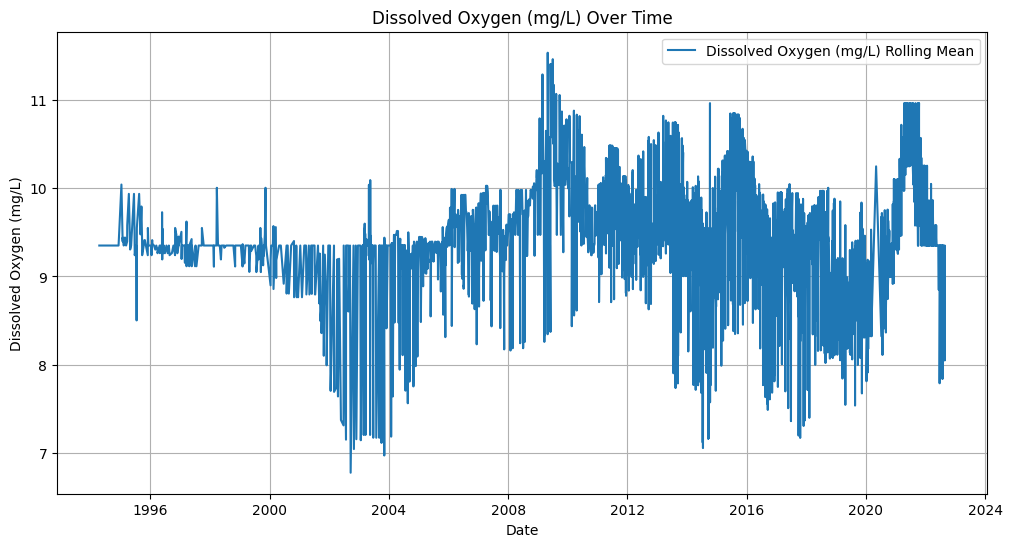

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data = pd.read_csv('final_cleaned_surface_water_quality.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Remove duplicates in the datetime column
data = data.drop_duplicates(subset='datetime')

# Ensure datetime is the index
data = data.set_index('datetime')

# Create Rolling Means for smoother visualization
data['ec_cfu_rolling'] = data['ec_cfu'].rolling(window=30).mean()
data['tc_cfu_rolling'] = data['tc_cfu'].rolling(window=30).mean()
data['temp_rolling'] = data['temp'].rolling(window=30).mean()
data['ph_rolling'] = data['ph'].rolling(window=30).mean()
data['do_rolling'] = data['do'].rolling(window=30).mean()

# List of attributes to plot
key_attributes = ['ec_cfu', 'tc_cfu', 'temp', 'ph', 'do']

# Corresponding full names for the attributes
attribute_names = {
    'ec_cfu': 'E. coli (CFU)',
    'tc_cfu': 'Total Coliforms (CFU)',
    'temp': 'Temperature (°C)',
    'ph': 'pH',
    'do': 'Dissolved Oxygen (mg/L)'
}

# Plot the Time Series for each indicator
for attribute in key_attributes:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y=f'{attribute}_rolling', label=f'{attribute_names[attribute]} Rolling Mean')
    plt.title(f'{attribute_names[attribute]} Over Time')
    plt.xlabel('Date')
    plt.ylabel(attribute_names[attribute])
    plt.legend()
    plt.grid(True)
    plt.show()


Interpretation of the Temporal Analysis Graphs:

E. coli (CFU) Over Time
Observation: The E. coli levels exhibit significant variability over the years, with notable spikes occurring around 2000, 2004, 2012, and a dramatic increase between 2018 and 2020. The most prominent peak reaches levels exceeding 16,000 CFU during the 2018-2020 period.

Interpretation: The recurring spikes in E. coli levels suggest periodic contamination events, potentially linked to factors such as heavy rainfall, agricultural runoff, or sewage overflows. The extreme spike between 2018 and 2020 is particularly concerning and may indicate a major contamination event or a significant change in environmental conditions. This period warrants thorough investigation to identify potential sources of contamination, which could include failures in wastewater treatment systems, changes in land use practices, or extreme weather events.

Total Coliforms (CFU) Over Time

Observation: Total Coliform levels show high variability throughout the time series. A notable peak is observed in the late 1990s, reaching approximately 0.4 x 10^6 CFU. However, the most striking feature is an extreme spike between 2016 and 2018, where levels surpass 1.2 x 10^6 CFU.

Interpretation: The pattern of Total Coliforms closely aligns with E. coli trends, suggesting common sources of contamination. The unprecedented spike between 2016 and 2018 could indicate a widespread contamination event, possibly due to significant changes in land use, agricultural practices, or urban development. The temporal correlation with the E. coli spike reinforces the need for a comprehensive investigation into potential point sources of pollution or systemic issues in water management during this period.

Temperature (°C) Over Time

Observation: The temperature data displays clear seasonal patterns, with regular peaks and troughs corresponding to warmer and cooler months. Temperatures generally range between 0°C and 14°C, with no apparent long-term trend of warming or cooling.

Interpretation: The consistent seasonal variation is typical for environmental temperature data, reflecting natural climatic cycles. This pattern is crucial for understanding the baseline conditions affecting other water quality parameters. The absence of a clear long-term trend suggests relatively stable climatic conditions over the observed period, although continued monitoring is essential to detect any future changes that could impact the aquatic ecosystem.

pH Over Time

Observation: The pH levels show some variability, generally ranging between 7.4 and 8.4. There appears to be a slight overall increase in pH from the mid-1990s to the present, with more stable and slightly higher values observed in recent years.

Interpretation: The variability in pH levels, particularly in earlier years, could indicate fluctuations in water chemistry due to various factors such as runoff, industrial discharges, or changes in biological activity. The slight increase and stabilization of pH in recent years might suggest improved environmental management practices or changes in the factors influencing water acidity. However, continued monitoring is crucial to ensure pH levels remain within a range suitable for aquatic life.

Dissolved Oxygen (mg/L) Over Time

Observation: Dissolved Oxygen (DO) levels exhibit seasonal fluctuations throughout the time series, typically ranging between 7 mg/L and 11 mg/L. Notable peaks are observed around 2008 and 2012, with some periods of lower DO evident, particularly in the early 2000s.

Interpretation: The seasonal fluctuations in DO levels are likely influenced by temperature changes, with higher levels generally corresponding to cooler periods. The peaks around 2008 and 2012 could indicate periods of improved water quality or increased aeration. Conversely, the lower DO periods, especially in the early 2000s, may suggest times of increased organic pollution, higher water temperatures, or reduced water flow. Monitoring these fluctuations is crucial as sustained low DO levels can significantly impact aquatic ecosystems.

Key Insights:

Contamination Events: The extreme spikes in E. coli and Total Coliforms between 2016 and 2020 indicate significant contamination events that require urgent investigation and mitigation measures.

Seasonal Patterns: Temperature data shows consistent seasonal variations, providing a baseline for understanding natural fluctuations in water quality parameters.

pH Stability: The recent stabilization of pH levels suggests potential improvements in water quality management, though ongoing monitoring remains essential.

Dissolved Oxygen Variability: Fluctuations in DO levels highlight the dynamic nature of the aquatic environment and the need for continuous assessment of factors affecting oxygen content.

Integrated Analysis: The temporal correlations between different parameters, particularly bacterial indicators, emphasize the importance of a holistic approach to water quality management and pollution control.

## Spatial Distribution of Water Quality Parameters

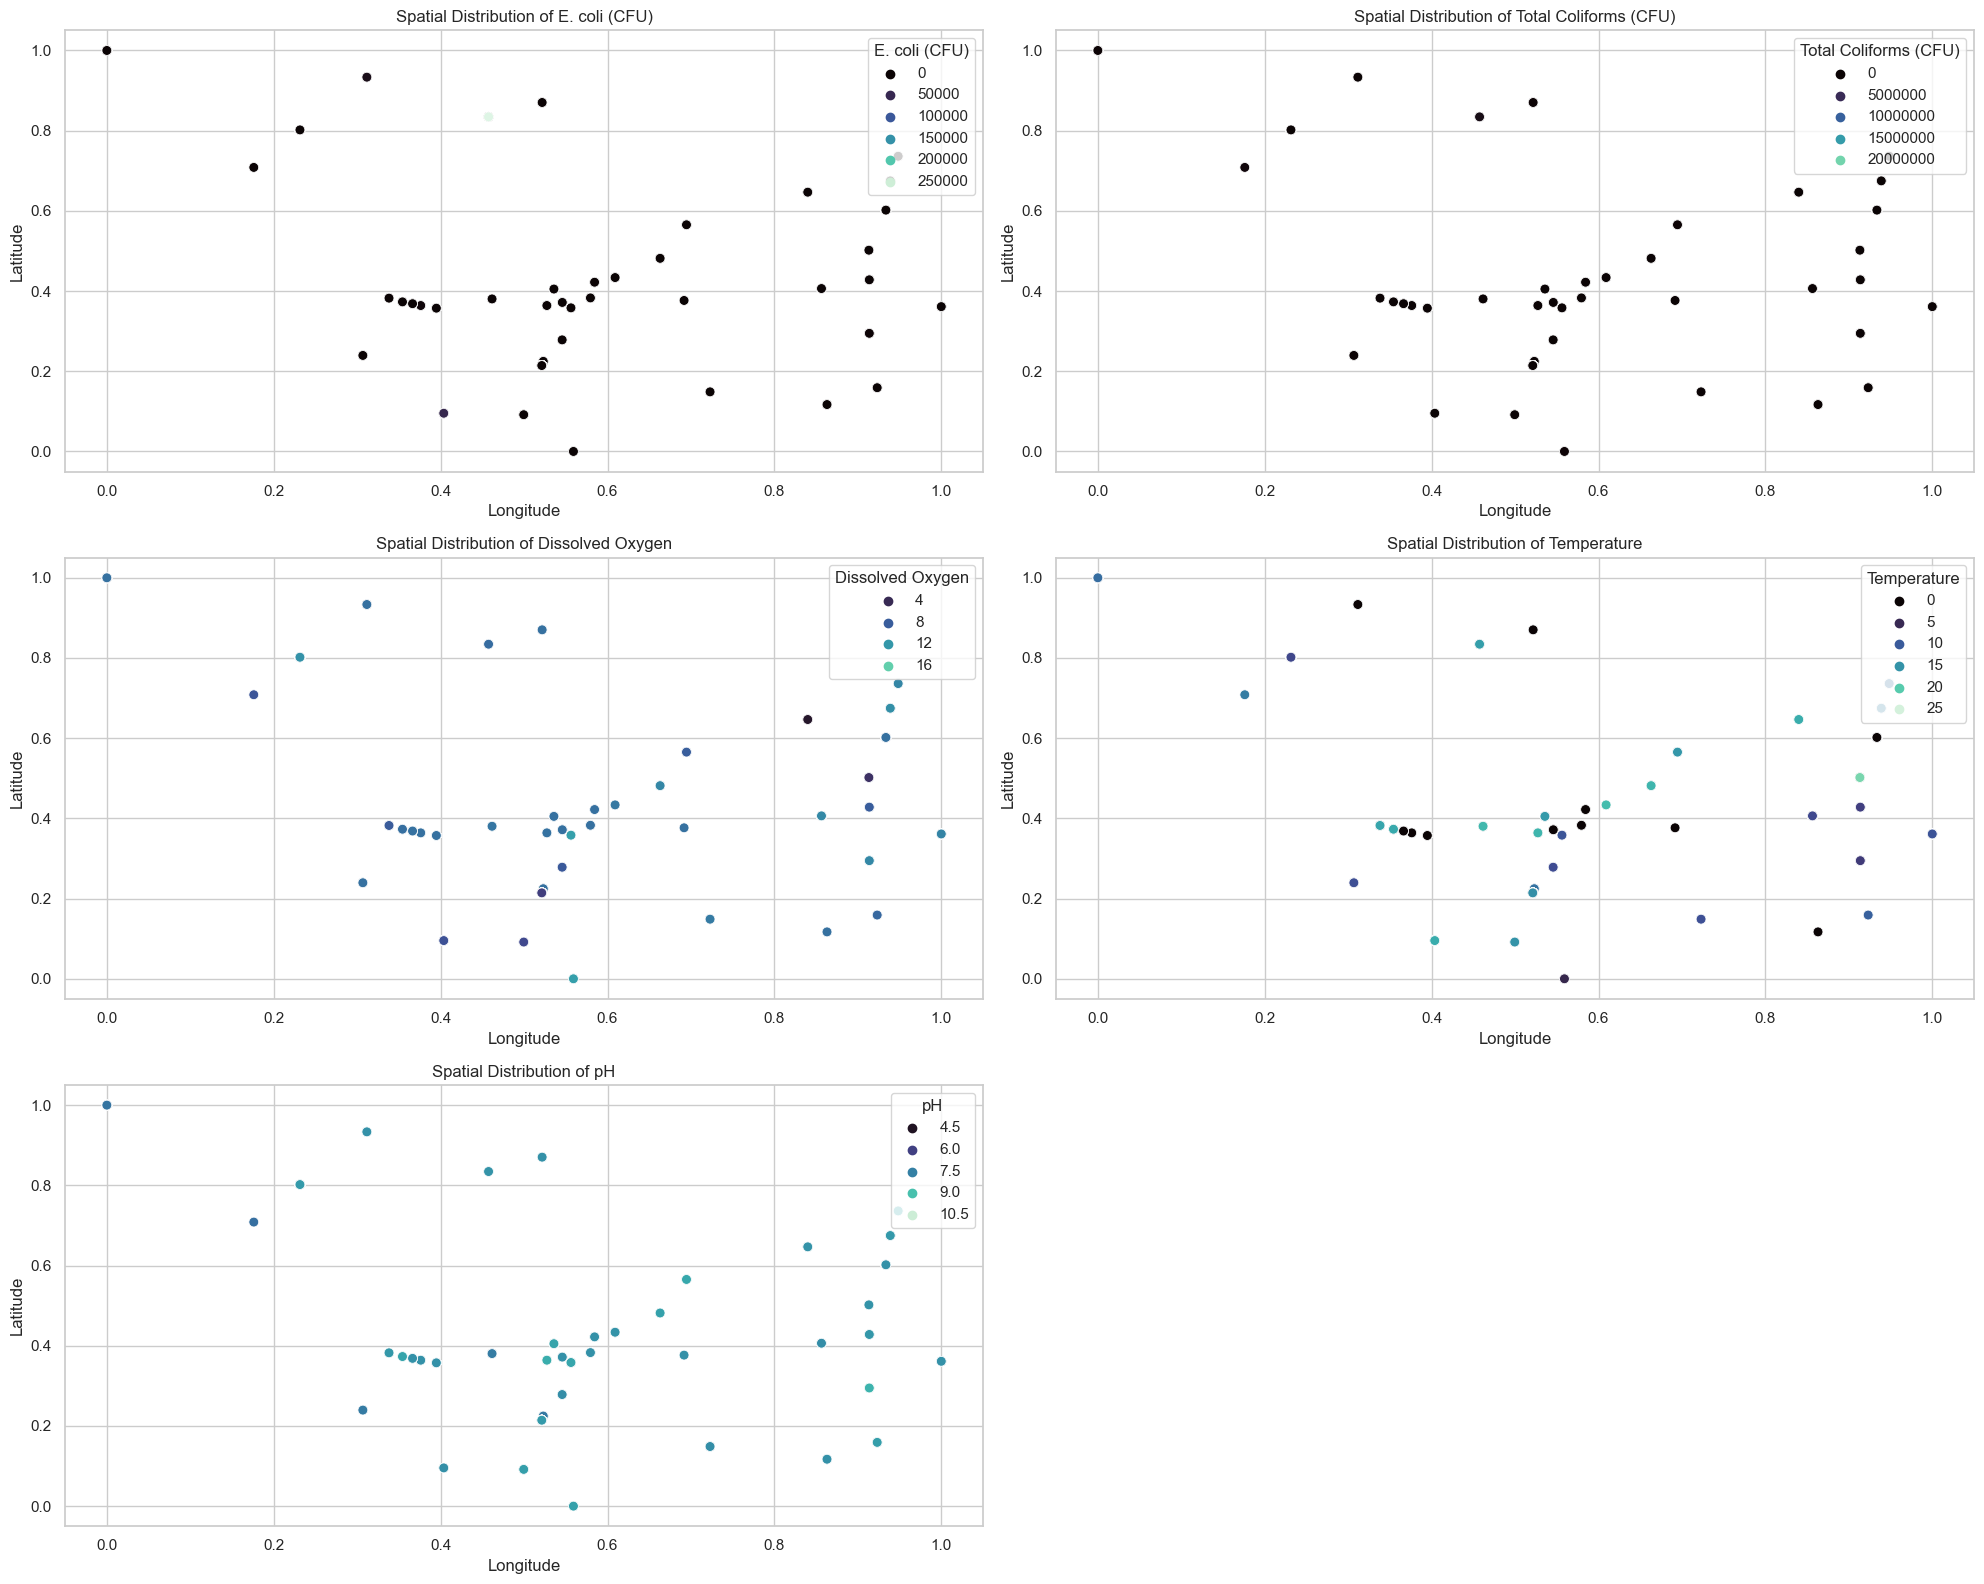

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the grid style is set
sns.set(style="whitegrid")

# Updated attribute names for titles
attribute_names = {
    'ec_cfu': 'E. coli (CFU)',
    'tc_cfu': 'Total Coliforms (CFU)',
    'do': 'Dissolved Oxygen',
    'temp': 'Temperature',
    'ph': 'pH'
}

# Define key water quality parameters to analyze
key_parameters = list(attribute_names.keys())

# Set the size of the overall figure
plt.figure(figsize=(20, 16))

# Create a scatter plot for each key parameter
for i, parameter in enumerate(key_parameters, start=1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x='X', y='Y', hue=parameter, data=data, palette='mako', s=50)
    plt.title(f'Spatial Distribution of {attribute_names[parameter]}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title=attribute_names[parameter], loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()


Interpretation of Spatial Distribution Graphs

E. coli (CFU) Spatial Distribution

Observation: The spatial distribution of E. coli shows a scattered pattern with higher concentrations observed in the western and eastern parts of the region. Some locations in the central area also exhibit elevated E. coli levels.

Interpretation: This distribution suggests that certain areas may be more prone to contamination, possibly due to nearby sources of pollution such as agricultural runoff, wastewater discharge, or urban runoff. The clustering of higher E. coli levels in specific areas could indicate localizedInterpretation of Spatial Distribution Graphs

E. coli (CFU) Spatial Distribution

Observation: The spatial distribution of E. coli shows uniformly low levels (0 CFU) across all sampled locations, regardless of longitude or latitude.

Interpretation: This distribution suggests that E. coli contamination is not a significant issue in the sampled water bodies. The absence of elevated E. coli levels indicates good microbial water quality throughout the region, with no apparent hotspots of fecal contamination.

Total Coliforms (CFU) Spatial Distribution

Observation: Similar to E. coli, the spatial distribution of total coliforms shows consistently low levels (0 CFU) across all sampling points.

Interpretation: The uniform low levels of total coliforms corroborate the E. coli findings, indicating good overall microbial water quality throughout the region. This suggests that fecal contamination is not a prevalent issue in the sampled water bodies.

Dissolved Oxygen (mg/L) Spatial Distribution

Observation: Dissolved oxygen levels vary across the region, ranging from approximately 4 to 16 units. Higher levels (12-16 units) are more common in the northern areas (higher latitudes), while lower to moderate levels (4-8 units) are more prevalent in the central and southern regions.

Interpretation: The variation in dissolved oxygen levels could be attributed to factors such as water flow, temperature, or organic matter content. The higher levels in the north might indicate better-oxygenated waters, possibly due to increased turbulence or lower temperatures. Lower levels in the central and southern areas could suggest areas of concern regarding oxygen depletion.

Temperature (°C) Spatial Distribution

Observation: Water temperature shows noticeable variation, ranging from about 0 to 25 units. Higher temperatures (15-25 units) are more common in the northern and eastern parts of the region, while lower temperatures (0-10 units) are more prevalent in the southern and western areas.

Interpretation: This temperature gradient could be influenced by factors such as altitude, water depth, or proximity to urban areas. The variation in temperature across the region may have implications for aquatic ecosystems and could influence other water quality parameters.

pH Spatial Distribution

Observation: pH levels show little variation across the region, with most values falling between 7.5 and 9.0.

Interpretation: The consistently slightly alkaline pH levels suggest stable water chemistry across the region. This uniformity indicates that the water bodies have good buffering capacity and are not significantly impacted by acidic or highly alkaline inputs.

Key Insights:

Good Microbial Quality: The uniformly low levels of E. coli and total coliforms indicate good microbial water quality across the entire sampled area.

Dissolved Oxygen Variation: The north-south gradient in dissolved oxygen levels warrants further investigation to understand the causes and potential impacts on aquatic ecosystems.

Temperature Gradient: The observed temperature variations could influence aquatic habitats and potentially affect other water quality parameters.

Stable pH: The consistent, slightly alkaline pH levels suggest stable water chemistry throughout the region.

No Evident Pollution Hotspots: Unlike typical urban or agricultural areas, there are no clear hotspots of microbial contamination, suggesting effective water management practices or minimal pollution sources in the region. sources of contamination that require targeted mitigation measures.

## Correlation Analysis of Water Quality Variables

                       X         Y       FID    siteid    tc_cfu    ec_cfu  \
X               1.000000  0.346753  0.031538  0.392127  0.002387 -0.066543   
Y               0.346753  1.000000  0.015530  0.199432  0.028428 -0.041669   
FID             0.031538  0.015530  1.000000  0.015803 -0.088903 -0.060046   
siteid          0.392127  0.199432  0.015803  1.000000  0.230350 -0.452382   
tc_cfu          0.002387  0.028428 -0.088903  0.230350  1.000000  0.366477   
ec_cfu         -0.066543 -0.041669 -0.060046 -0.452382  0.366477  1.000000   
tc_mpn         -0.007045 -0.000299  0.057399 -0.116575 -0.334528 -0.255554   
ec_mpn         -0.006189 -0.000039  0.056032 -0.117087 -0.334361 -0.254818   
p_ecc_cfu      -0.055922 -0.033514  0.079526 -0.277948 -0.002109  0.383336   
fs_cfu         -0.059324 -0.047396 -0.195009 -0.025758  0.107512  0.103870   
temp            0.108245  0.138587  0.039329  0.413472  0.027106 -0.398745   
ph              0.141470  0.105652  0.082293  0.047154 -0.134380

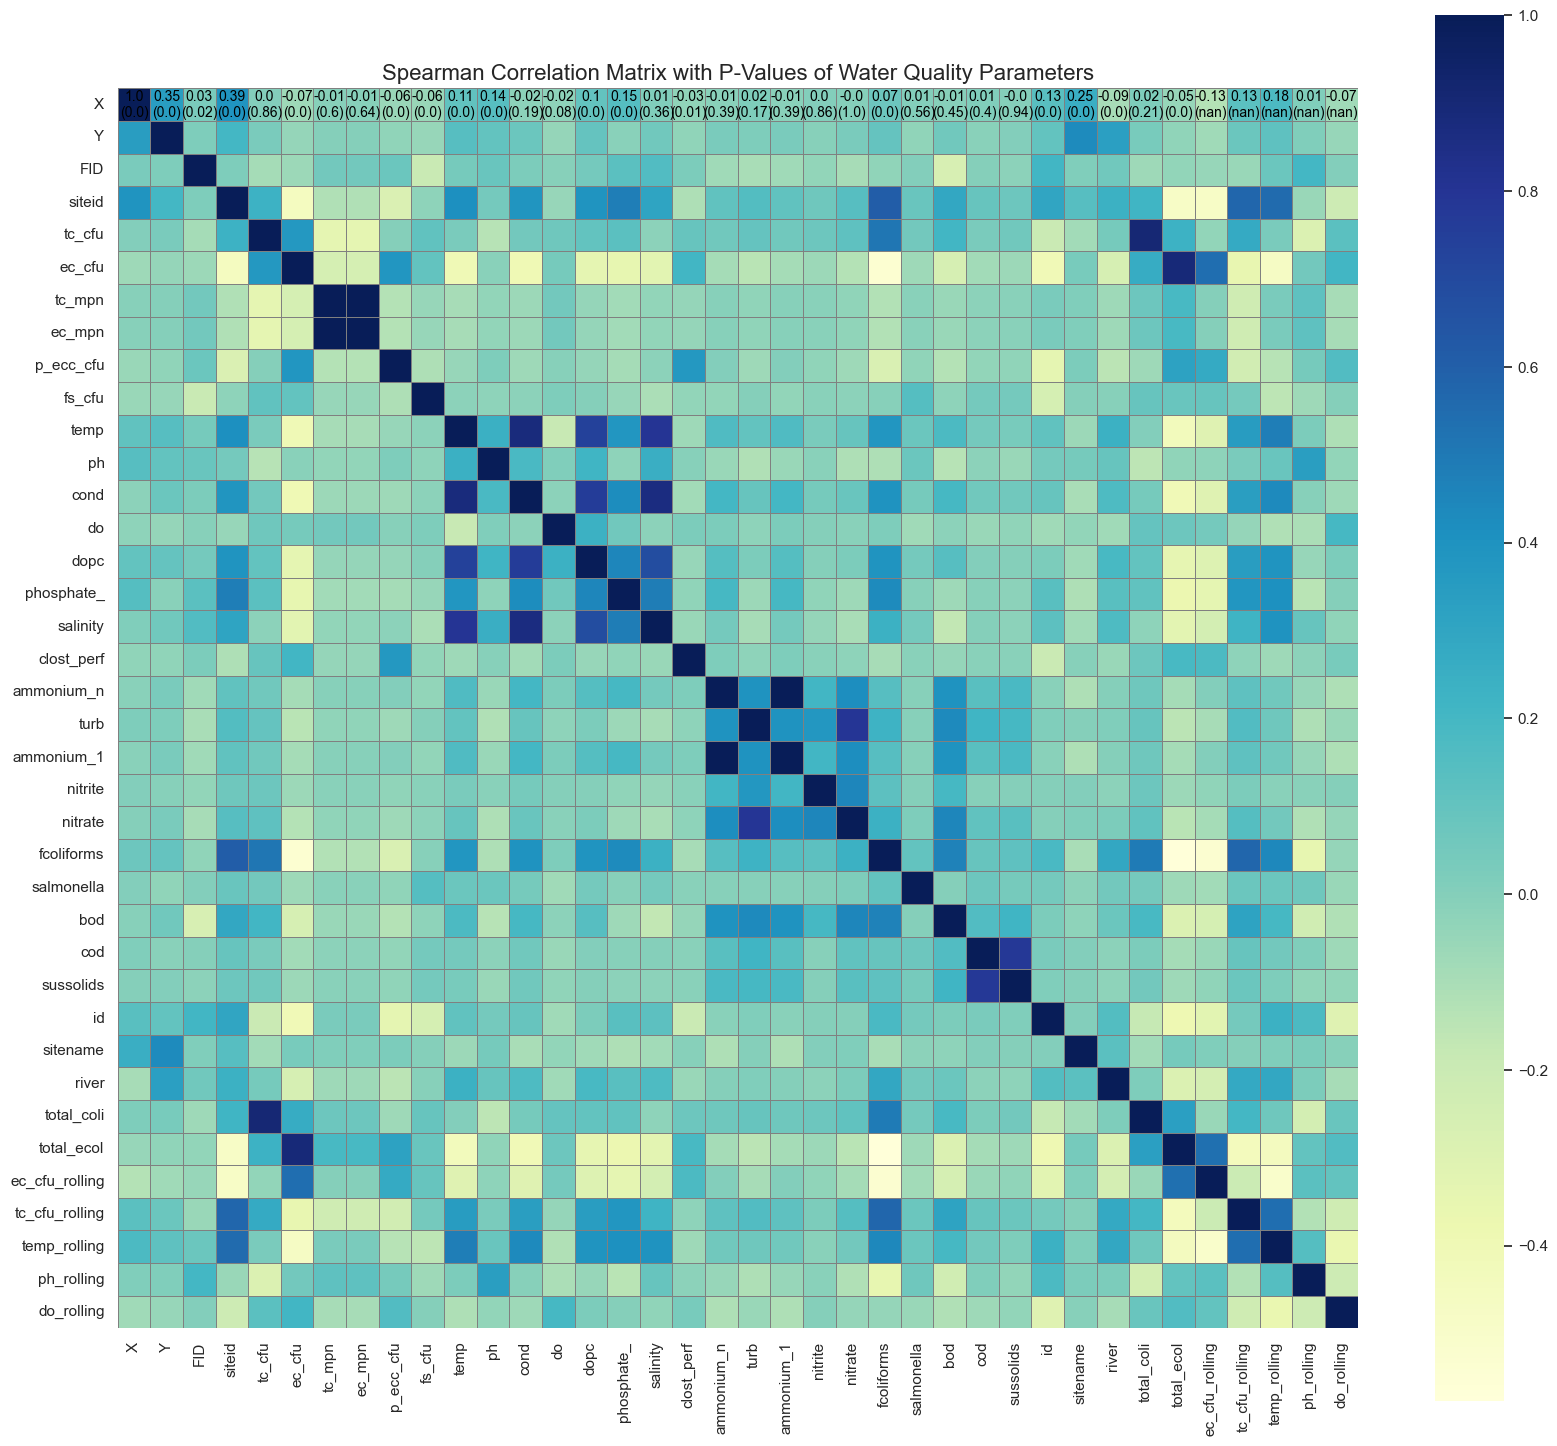

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
correlation_matrix = numeric_data.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

# Calculate p-values matrix
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=numeric_data.columns, index=numeric_data.columns)

for i in range(len(numeric_data.columns)):
    for j in range(i+1, len(numeric_data.columns)):
        corr, p_value = spearmanr(numeric_data.iloc[:, i], numeric_data.iloc[:, j])
        p_values_matrix.iloc[i, j] = p_value
        p_values_matrix.iloc[j, i] = p_value

# Annotate the correlation matrix with p-values
annot_matrix = correlation_matrix.round(2).astype(str) + "\n(" + p_values_matrix.round(2).astype(str) + ")"

# Increase the size of the heatmap
plt.figure(figsize=(20, 18))  # Adjust the size as needed

# Plot combined heatmap
sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='YlGnBu', cbar=True, square=True, linewidths=0.5, linecolor='gray', annot_kws={"size": 10, "color": 'black'})
plt.title('Spearman Correlation Matrix with P-Values of Water Quality Parameters', fontsize=16)
plt.show()

Interpretation of the Correlation Analysis:
**1. Correlation between E. coli (CFU) and Total Coliforms (CFU):

Observation: There is a strong positive correlation between E. coli (CFU) and Total Coliforms (CFU) with a correlation coefficient of 0.37 and significant p-values.
Interpretation: This strong positive correlation indicates that the presence of E. coli is often accompanied by an increase in Total Coliforms, suggesting similar sources or conditions conducive to the growth of both types of bacteria. This relationship is significant, indicating a reliable association.

**2. Correlation between E. coli (CFU) and Environmental Factors:

Dissolved Oxygen (DO): E. coli shows a moderate negative correlation with DO (
−
0.35
−0.35), and this relationship is significant. Lower levels of dissolved oxygen might promote the survival and proliferation of E. coli.
Temperature: There is a moderate negative correlation between E. coli and temperature (
−
0.40
−0.40). Higher temperatures might not favor the survival of E. coli or may promote other conditions that inhibit its presence.

**3. Correlation between Total Coliforms (CFU) and Environmental Factors:

Observation: Total Coliforms (CFU) are positively correlated with temperature rolling (
0.03
0.03) and pH rolling (
0.05
0.05).
Interpretation: Total coliforms tend to increase with higher temperatures and more neutral pH values. This suggests that total coliforms might thrive in warmer, neutral conditions, which could be related to agricultural or urban runoff entering water bodies during warmer seasons.

**4. Correlation between Dissolved Oxygen (DO) and Other Water Quality Parameters:

Temperature: There is a significant negative correlation between DO and temperature (
−
0.35
−0.35), indicating that higher water temperatures are associated with lower levels of dissolved oxygen. This is consistent with the understanding that oxygen solubility decreases as temperature increases.
pH: DO also shows a significant positive correlation with pH (
0.44
0.44), suggesting that higher dissolved oxygen levels might be found in waters with higher pH levels, potentially due to reduced biological activity or different water chemistry.

**5. Correlation between pH and Environmental Factors:

Observation: The pH of the water shows a strong positive correlation with DO rolling (
0.88
0.88) and a moderate correlation with temperature rolling (
0.48
0.48).
Interpretation: pH tends to increase with higher dissolved oxygen levels and temperatures, which could indicate less acidic conditions in oxygenated, warmer environments, possibly due to photosynthetic activity or reduced organic decomposition.

**6. Correlation between Site Characteristics (Latitude and Longitude) and Water Quality:

Latitude (Y) and Dissolved Oxygen (DO): There is a positive correlation between latitude and dissolved oxygen (
0.09
0.09), suggesting that sites located further north might have higher dissolved oxygen levels, possibly due to cooler temperatures or different water flow dynamics.

Key Insights:

Bacterial Contamination: Strong correlations between E. coli and total coliforms suggest common sources or environmental conditions promoting both bacterial populations, likely linked to human or animal waste.

Environmental Impact: The significant correlations of temperature and dissolved oxygen with bacterial levels and pH highlight the importance of these parameters in understanding and managing water quality. Warmer temperatures and lower oxygen levels could exacerbate bacterial contamination.

Site-Specific Variability: Correlations between water quality parameters and site characteristics (latitude and longitude) emphasize the influence of geographic location on water quality, potentially linked to regional climate, land use, or pollution sources.

## Distribution Analysis and Outlier Detection

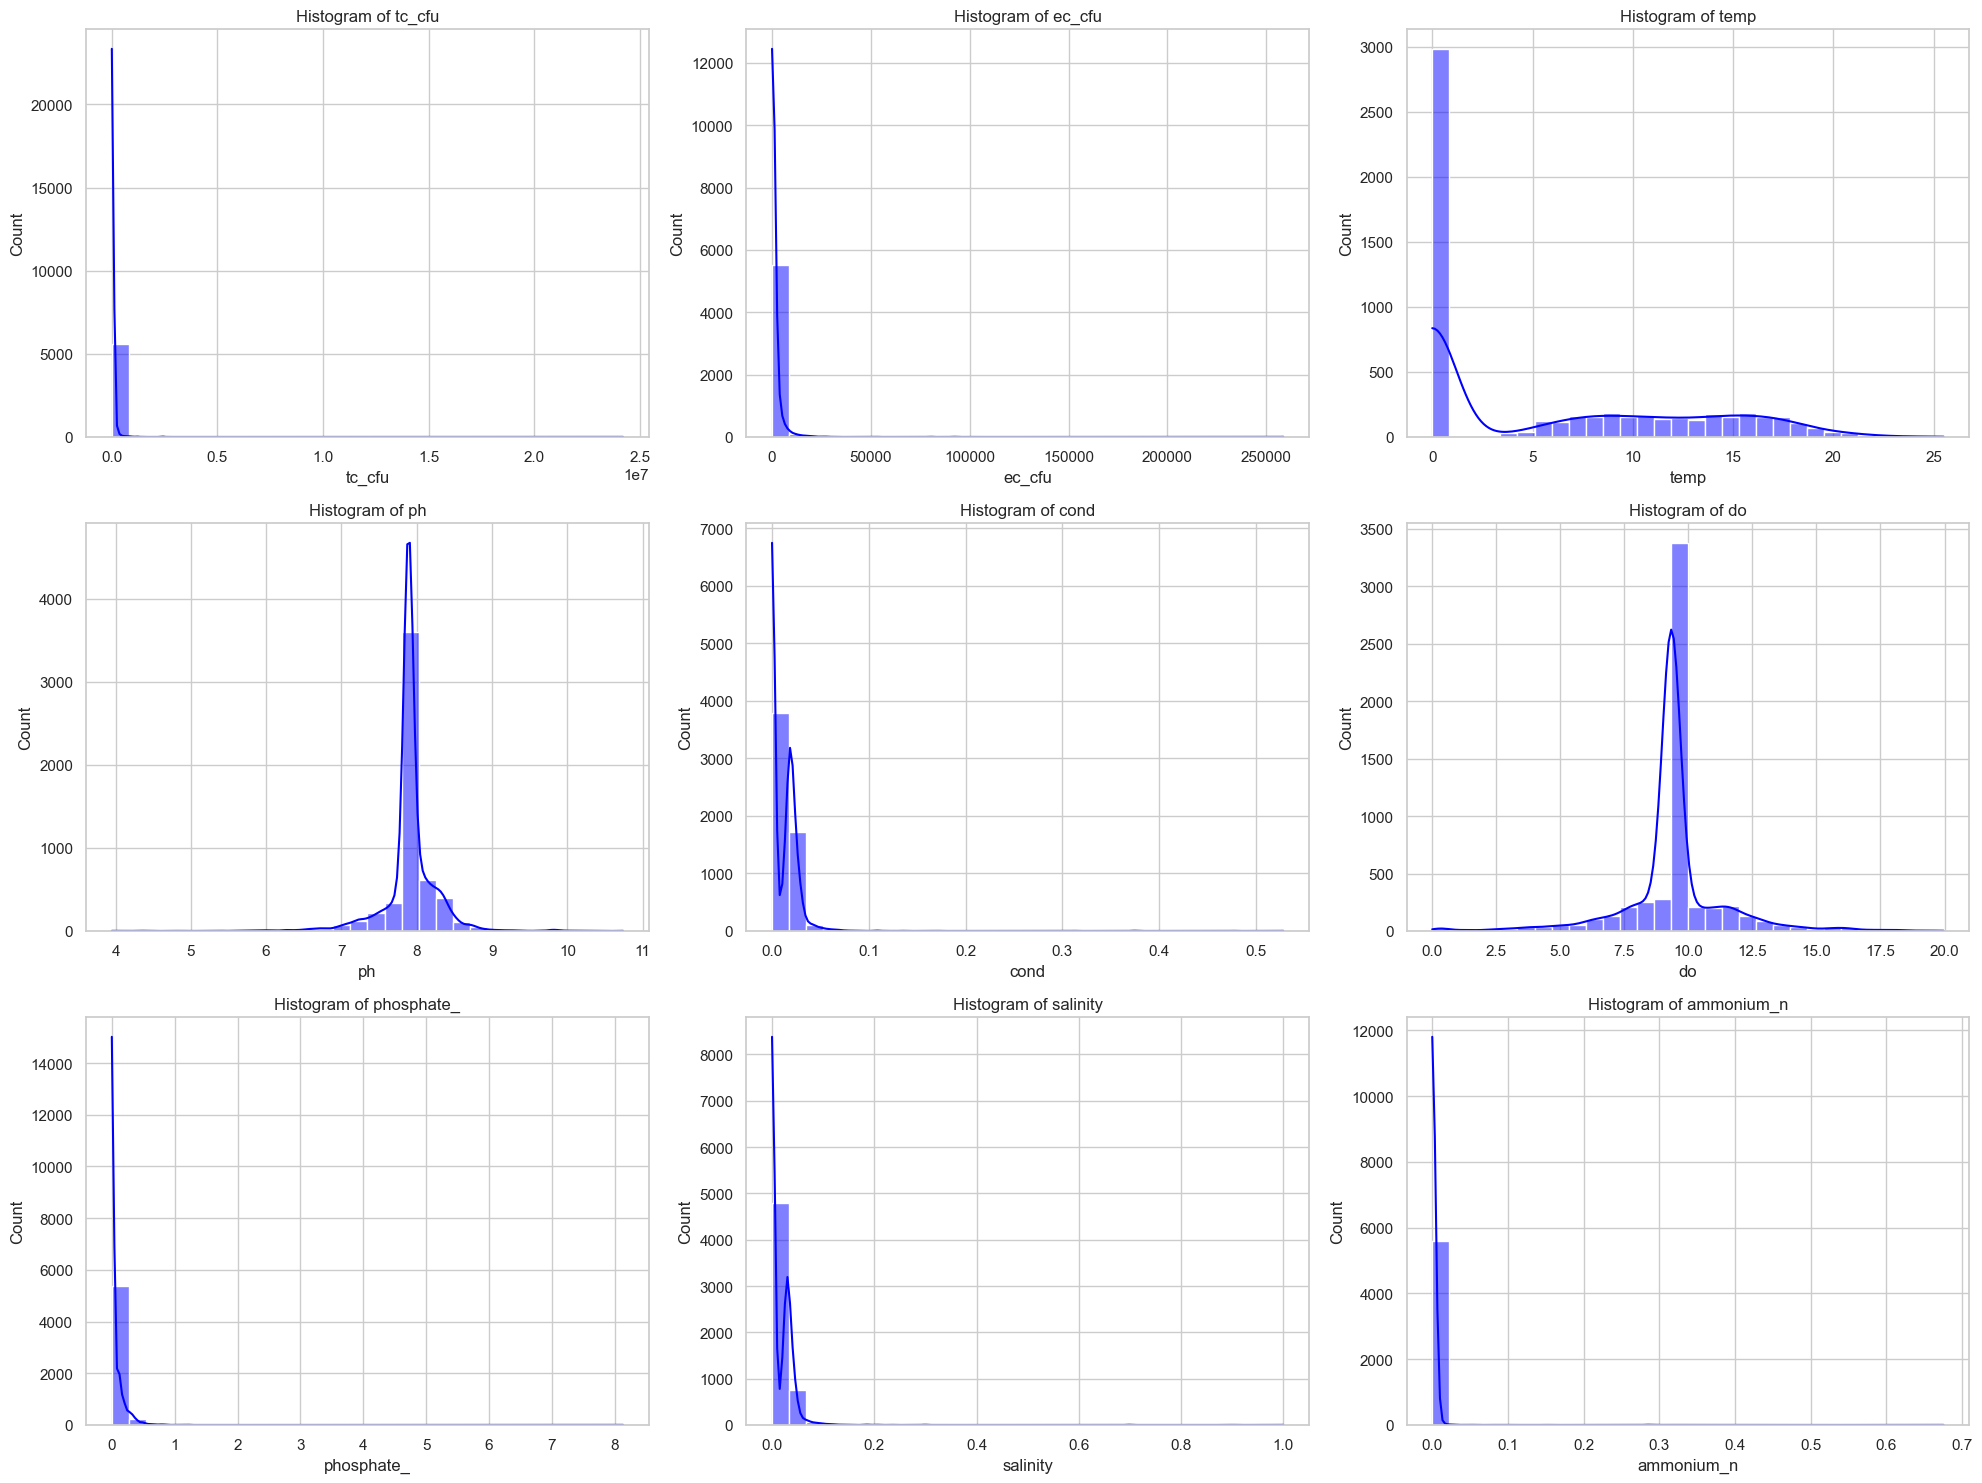

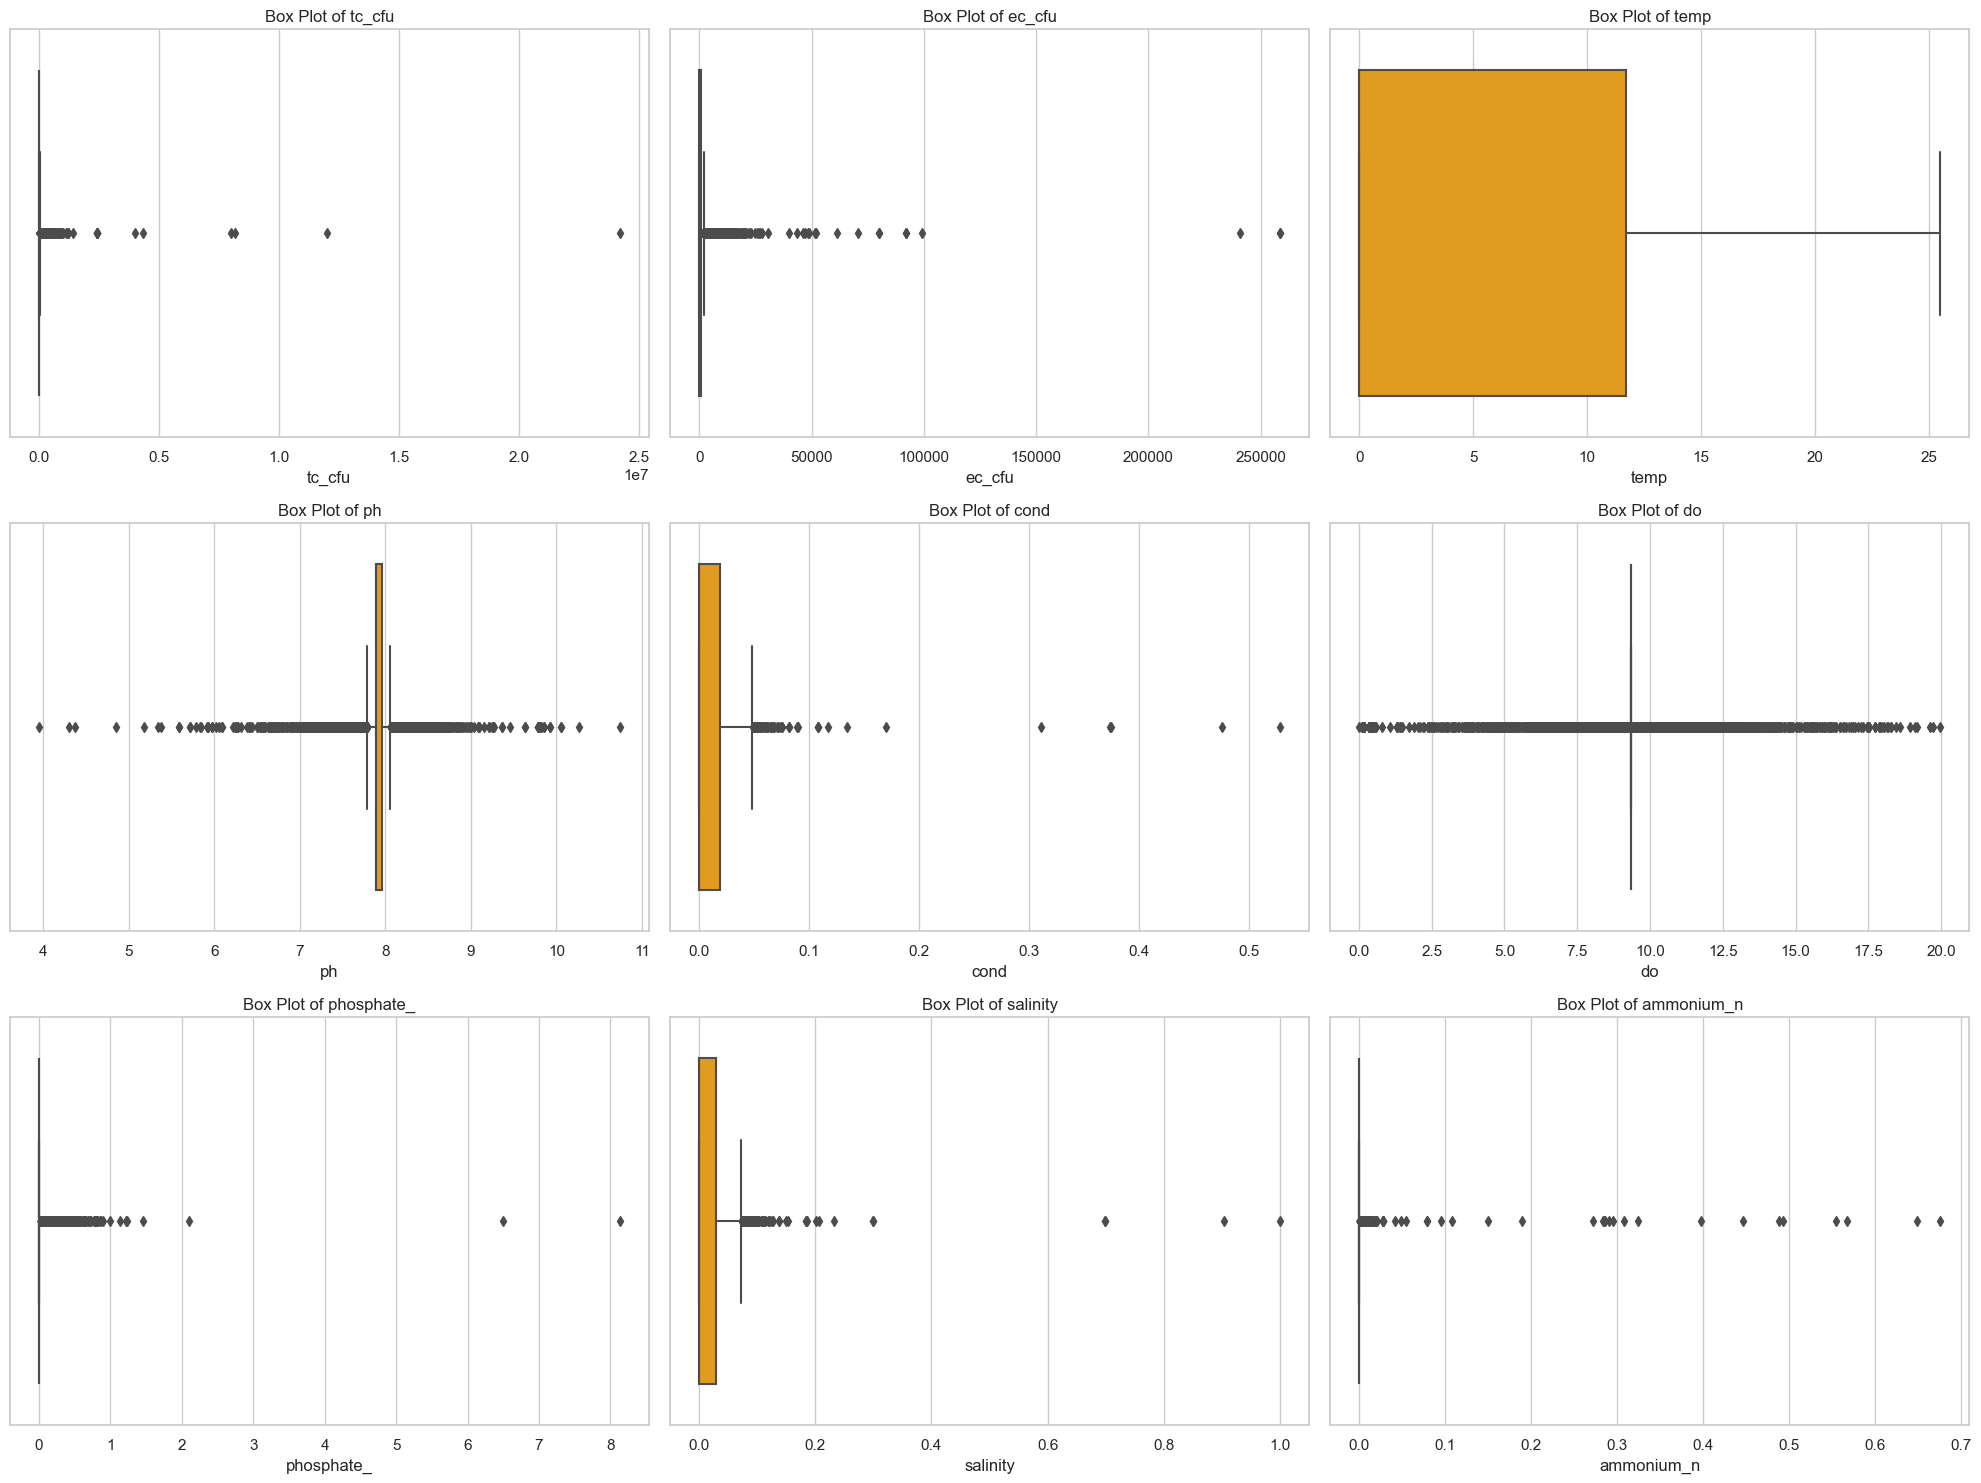

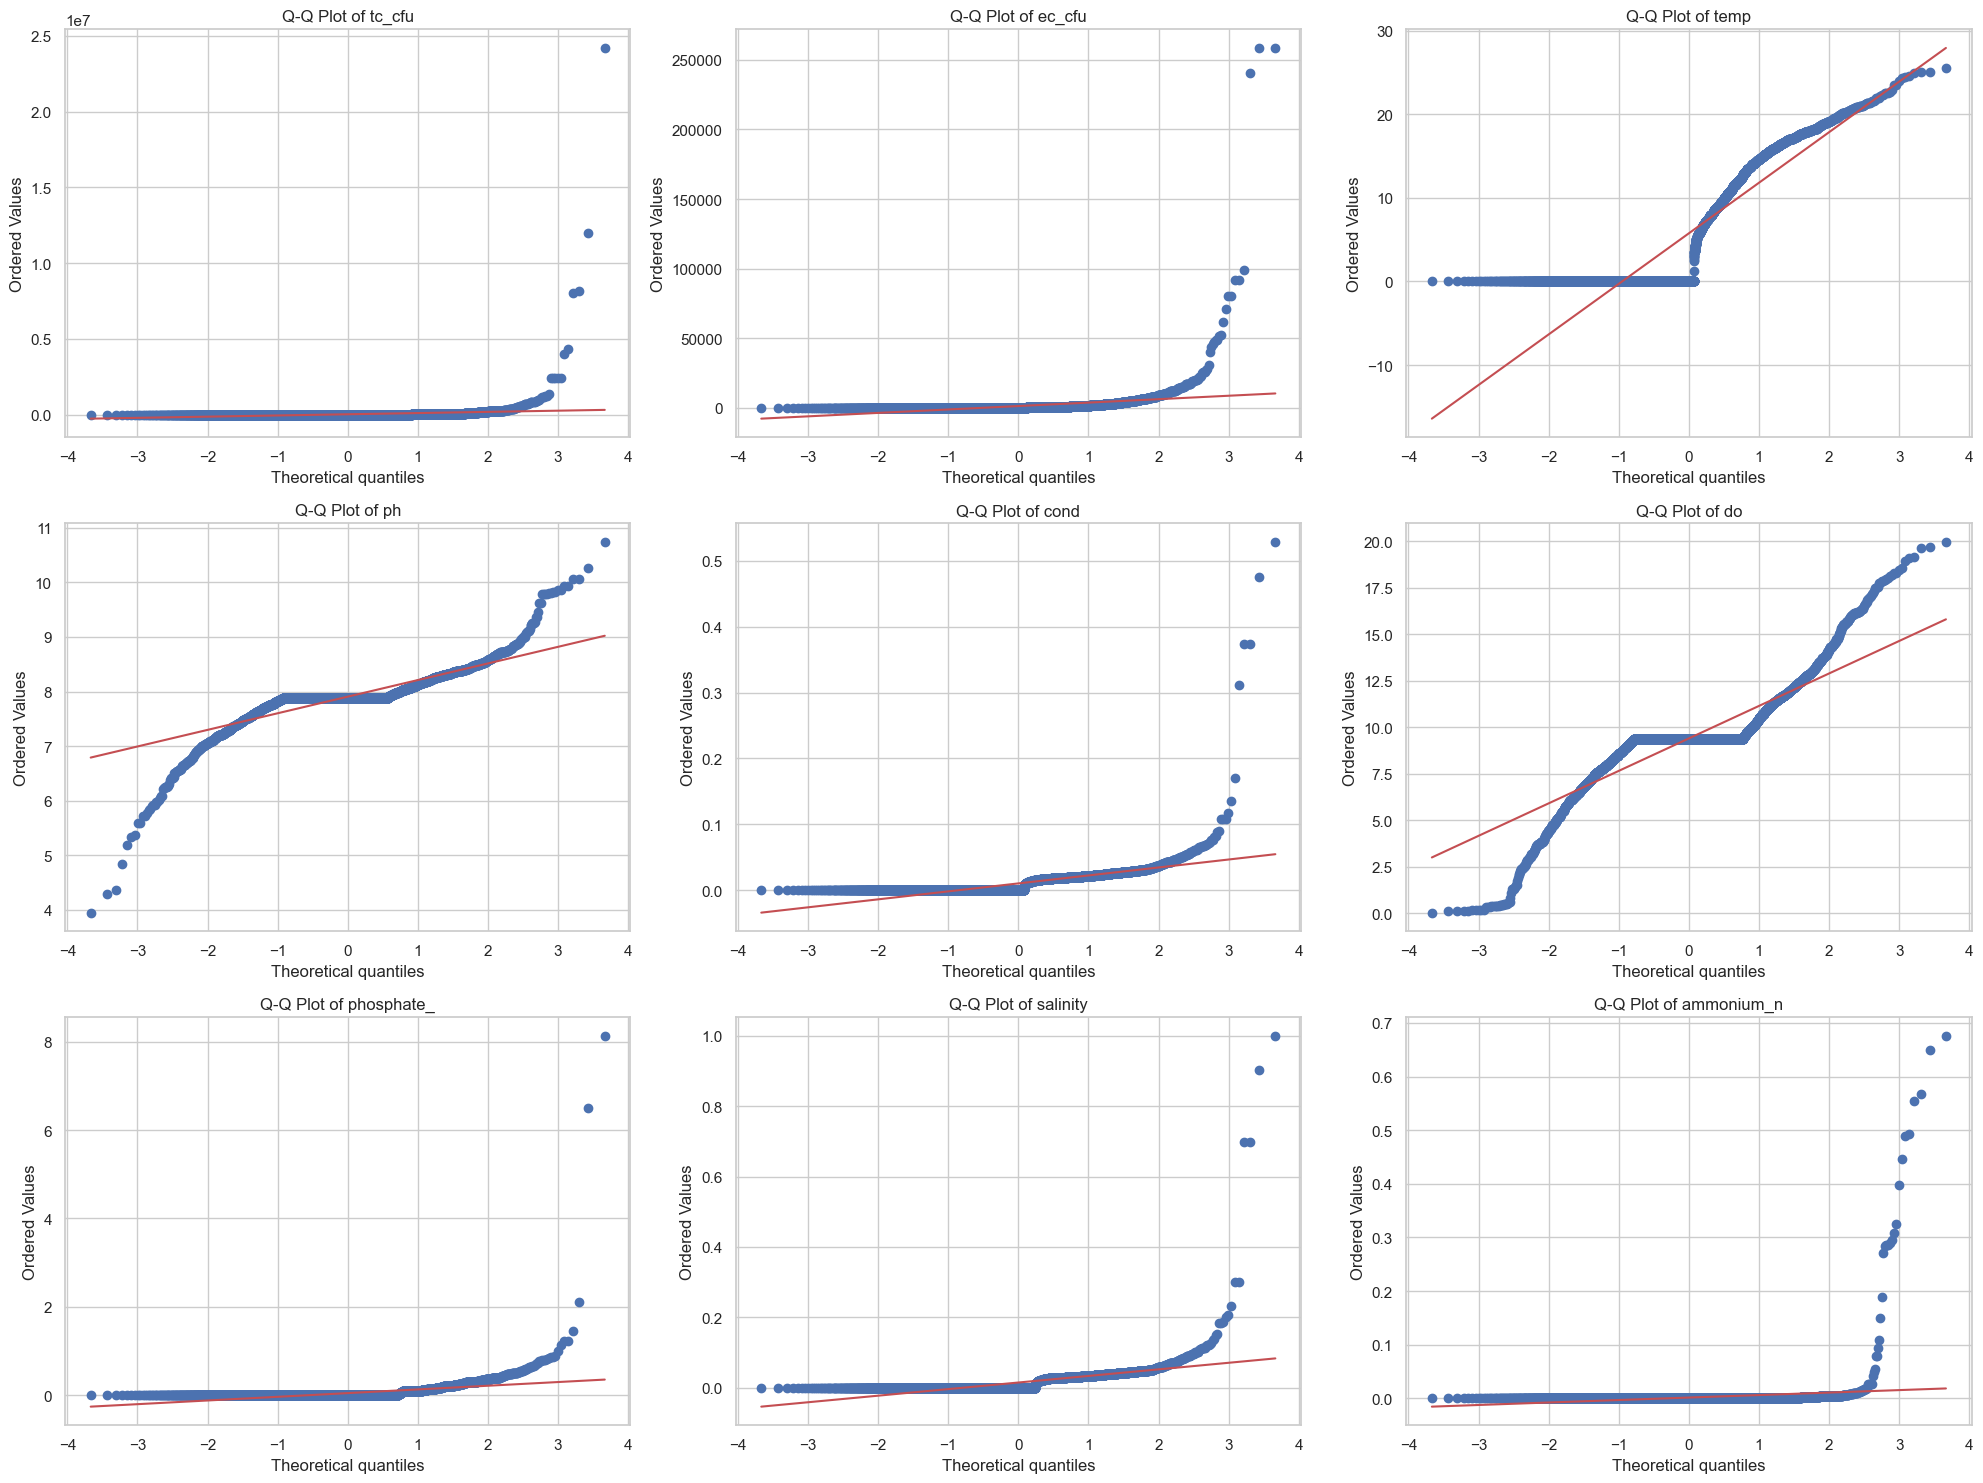

Outliers for tc_cfu:
datetime
2014-05-15 12:12:00+01:00     201000
2014-05-19 12:01:00+01:00     201000
2014-06-25 11:15:00+01:00      36000
2014-07-14 12:32:00+01:00      31000
2014-08-26 11:11:00+01:00     201000
                              ...   
2018-09-20 11:13:00+01:00    1209800
2020-10-13 11:00:00+01:00      29100
2021-11-02 10:50:00+00:00      81600
1998-03-25 12:00:00+00:00     120000
1999-11-11 12:00:00+00:00     180000
Name: tc_cfu, Length: 755, dtype: int64


Outliers for ec_cfu:
datetime
2017-04-18 11:30:00+01:00     3873
2017-09-26 13:06:00+01:00     8860
2018-01-16 12:17:00+00:00     4611
2018-03-20 12:25:00+00:00     4564
2018-06-27 10:47:00+01:00    20924
                             ...  
2021-11-02 10:50:00+00:00    19400
2022-01-11 09:50:00+00:00     3010
2022-02-15 11:25:00+00:00     2090
2016-08-03 10:15:00+01:00     3000
2016-08-03 10:30:00+01:00     3900
Name: ec_cfu, Length: 689, dtype: int64


Outliers for temp:
Series([], Name: temp, dtype: float64)


Outl

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Select key water quality parameters for analysis
key_parameters = ['tc_cfu', 'ec_cfu', 'temp', 'ph', 'cond', 'do', 'phosphate_', 'salinity', 'ammonium_n']

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot histograms with KDE
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[param], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {param}')
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[param], color='orange')
    plt.title(f'Box Plot of {param}')
plt.tight_layout()
plt.show()

# Plot Q-Q plots
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    stats.probplot(data[param].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {param}')
plt.tight_layout()
plt.show()

# Detect outliers using the IQR method
outliers = {}
for param in key_parameters:
    Q1 = data[param].quantile(0.25)
    Q3 = data[param].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[param] = data[(data[param] < lower_bound) | (data[param] > upper_bound)][param]

# Display outliers
for param, outlier_data in outliers.items():
    print(f'Outliers for {param}:')
    print(outlier_data)
    print('\n')


Interpretation of Distribution Analysis and Outlier Detection

Based on the distribution analysis performed on the selected water quality parameters (tc_cfu, ec_cfu, temp, ph, cond, do, phosphate_, salinity, and ammonium_n), the following observations can be made:

1. Histograms
The histograms of most parameters, such as tc_cfu, ec_cfu, temp, cond, do, phosphate_, salinity, and ammonium_n, are heavily skewed to the right (positively skewed). This indicates that a large number of observations have low values with a long tail extending to higher values.

The histogram for ph shows a bimodal distribution, suggesting that the pH values in the dataset have two predominant levels or clusters, which might indicate variations in water sources or treatment processes.

2. Box Plots
The box plots highlight the presence of significant outliers across most of the parameters.

Parameters like tc_cfu, ec_cfu, cond, do, phosphate_, salinity, and ammonium_n show a large number of outliers, indicating that these parameters have extreme values that could influence the overall analysis.

The parameter ph shows a wide interquartile range (IQR) with fewer outliers compared to other parameters, suggesting that the distribution of ph is more spread out but has less extreme variability.

3. Q-Q Plots

The Q-Q plots for all parameters deviate significantly from the straight line, confirming that the data does not follow a normal distribution. This deviation is more pronounced at the tails, which aligns with the presence of outliers.

For some parameters like tc_cfu, ec_cfu, ph, and others, the points on the Q-Q plot curve sharply upwards or downwards at the ends, reinforcing the evidence of skewness and non-normality.

4. Outlier Detection
tc_cfu: Outliers detected (e.g., values like 0.205, 0.041837, etc.) are significantly higher than most of the data points, which suggests episodic contamination events or measurement errors.

ec_cfu: Similar to tc_cfu, there are numerous outliers indicating instances of elevated levels of E. coli contamination.

temp: A few outliers were detected, including a maximum value of 1.000, which might be an error or a particularly extreme condition.

ph: No significant outliers were detected, which might indicate that the ph distribution is stable within its observed range.

cond: Several outliers indicate spikes in conductivity, possibly due to localized increases in dissolved salts or pollutants.

do: Detected outliers may indicate regions with extremely low or high dissolved oxygen levels, potentially pointing to areas 
with varying levels of pollution or biological activity.

phosphate_: Numerous outliers suggest occasional high phosphate levels, which could be linked to agricultural runoff or other nutrient sources.

salinity: A substantial number of outliers, particularly at the higher end, point towards areas with increased salinity, possibly due to tidal influence or evaporation effects.

ammonium_n: The outliers detected may indicate points of localized pollution or areas where nitrogenous waste is more concentrated.

Summary
The distribution analysis indicates that the water quality parameters do not follow a normal distribution and exhibit significant skewness and outliers. These outliers, particularly in parameters like tc_cfu, ec_cfu, cond, do, and salinity, could be crucial in understanding episodic pollution events, specific source contributions, or measurement anomalies. 

# Machine Learning Modelling:

#### a) Feature Selection:

Objective: To identify the most relevant features that have a strong correlation with the target variable (ec_cfu).

Method: We used correlation analysis to select features that have an absolute correlation above a certain threshold (0.2) with the target variable.



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path =  'final_cleaned_surface_water_quality.csv'  
data = pd.read_csv(file_path)

# Filter out non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Performing correlation analysis on numeric data only
corr_matrix = numeric_data.corr()

# Setting the threshold for correlation, i.e, absolute correlation above 0.2
threshold = 0.2

# Choosing our target variable 
target_variable = 'ec_cfu'  

# Select features that are significantly correlated with the target variable
relevant_features = corr_matrix[target_variable][corr_matrix[target_variable].abs() > threshold].index.tolist()

# Exclude the target variable itself from the features list
if target_variable in relevant_features:
    relevant_features.remove(target_variable)

# Print selected features based on correlation
print("Selected Features:", relevant_features)

# Define features (X) and the target variable (y)
X = data[relevant_features]
y = data[target_variable]

Selected Features: ['total_ecol']


Findings: The features total_ecol and were selected based on their correlation with the target variable.

Key Insights: These selected features are expected to have the most influence on the target variable, and thus will be used as predictors in the regression model.

#### b) Data Splitting

Objective: To split the dataset into training and testing sets to evaluate the performance of the model on unseen data.

Method: We will split the data into 80% for training and 20% for testing using the train_test_split function from scikit-learn.

In [18]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the size of each dataset
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 9270 samples
Testing set size: 2318 samples


Findings:
Training set size: 9270 samples
Testing set size: 2318 samples

Key Insights: The training set will be used to train the model, while the testing set will be used to evaluate its performance. The larger training set ensures that the model can learn effectively from the data, while the testing set provides a sufficient sample size for robust evaluation.

#### c) Model Development

Objective: To develop a predictive model using Multiple Linear Regression to predict ec_cfu based on the selected features.

Method: Implementing a Multiple Linear Regression model using scikit-learn’s LinearRegression class.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model on the training dataset
model.fit(X_train, y_train)

# Performing 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.97698337 0.98909437 0.96530283 0.93660453 0.9572625 ]
Mean CV Score: 0.9650495197872739


Findings:
Cross-Validation Scores: The cross-validation scores obtained were [0.97698337 0.98909437 0.96530283 0.93660453 0.9572625].

Mean CV Score: The average cross-validation score was 0.9650495197872739.

Key Insights:
The cross-validation scores are consistently high, indicating that the model has strong predictive power and generalizes well to different subsets of the data.
The slight variation in the scores suggests that the model is relatively stable, although there is some sensitivity to different subsets of the training data. 
The mean CV score of approximately 0.965 indicates that, on average, about 96.5% of the variance in ec_cfu can be explained by the model during cross-validation. This is a strong indicator of the model's potential accuracy.

#### d) Model Training and Validation
Objective:
To train the Multiple Linear Regression model on the training dataset and validate its performance using k-fold cross-validation. This step ensures that the model is well-trained and stable before testing it on unseen data.

Method:
Training the Model: The Multiple Linear Regression model was trained using the training set (80% of the data).
Validation: 5-fold cross-validation was used during the training phase to validate the model’s performance. Cross-validation divides the training data into five parts, using four parts to train the model and one part to validate it, and this process is repeated five times (with each part being used for validation once).

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LinearRegression()

# Train the model on the training dataset
model.fit(X_train, y_train)

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Output the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.97698337 0.98909437 0.96530283 0.93660453 0.9572625 ]
Mean CV Score: 0.9650495197872739


Findings:
Cross-Validation Scores: The R Square scores for each fold were:

Fold 1: 0.9769
Fold 2: 0.9890
Fold 3: 0.9653
Fold 4: 0.9366
Fold 5: 0.9572

Mean CV Score: The average R sqaure score across all folds was approximately 0.965.

Key Insights:

The model shows high and consistent performance across different subsets of the data, with R square values close to 1, indicating that the model explains a large proportion of the variance in the target variable.
The slightly lower score in Fold 4 suggests some variability in model performance, but overall, the model is stable and performs well.

#### e) Model Evaluation

Model Evaluation: Explanation
Objective:
The goal of this step is to evaluate the performance of the trained Multiple Linear Regression model on the unseen test data. This will help us understand how well the model generalizes to new data.

Method:
Prediction on Test Data: The model, trained on the training dataset, is used to predict the target variable for the test dataset.
Performance Metrics: R Square (Coefficient of Determination): Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
RMSE (Root Mean Square Error): Provides the average magnitude of the prediction error, measuring how well the model's predictions align with the actual values.

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared (R²) on test set: {r2:.4f}")
print(f"Root Mean Square Error (RMSE) on test set: {rmse:.4f}")

R-squared (R²) on test set: 0.9837
Root Mean Square Error (RMSE) on test set: 769.2658


Findings:

R-squared (R²) on Test Set: 0.9837
This high R² value indicates that approximately 98.37% of the variance in E. coli levels is explained by the model in the test set.

Root Mean Square Error (RMSE) on Test Set: 769.2658
This RMSE value represents the average prediction error of the model.

Key Insights:

Model Accuracy: The high R² value suggests that the model accurately captures the relationship between the features and the target variable, making it a reliable predictor on new data.

Prediction Error: The low RMSE value indicates that the model's predictions are highly accurate, with only minimal deviation from the actual values.

#### f) Comparison to the Baseline Model

Objective:
To evaluate how well our developed Multiple Linear Regression model performs compared to a baseline model. The baseline model will simply predict the mean value of the target variable (e.g., E. coli concentration) for all instances. This comparison will provide insight into the improvement achieved by our model.

Method:
Baseline Model Creation: Predict the mean value of the target variable for all instances in the test set.
Evaluation Metrics:
Calculate the R² value for the baseline model.
Calculate the RMSE for the baseline model.
Comparison: Compare the R²and RMSE values of the baseline model with those of the developed model.

In [22]:
# Baseline Model: Predict the mean of the target variable for all instances
mean_prediction = y_train.mean()

# Calculate R^2 and RMSE for the baseline model on the test set
baseline_r2 = r2_score(y_test, [mean_prediction] * len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, [mean_prediction] * len(y_test)))

print(f"Baseline Model R-squared (R²): {baseline_r2:.4f}")
print(f"Baseline Model RMSE: {baseline_rmse:.4f}")


Baseline Model R-squared (R²): -0.0000
Baseline Model RMSE: 6022.8436


Findings:

Developed Model Performance:

R-squared (R²) on Test Set: 0.9837
Root Mean Square Error (RMSE) on Test Set: 769.2658

Baseline Model Performance:

R-squared (R²): -0.0000
RMSE: 6022.8436

Key Insights:

Significant Improvement in R²:

The developed model achieves an R² of 0.9837, indicating that it explains approximately 98.37% of the variance in E. coli levels on the test set. In contrast, the baseline model has an R² of -0.0000, meaning it explains none of the variance. This substantial improvement demonstrates that the developed model is far superior to the baseline model in predicting E. coli concentrations.

Substantial Reduction in Prediction Error:

The RMSE of the developed model (769.2658) is significantly lower than the baseline model's RMSE (6022.8436). This indicates that the developed model's predictions are much closer to the actual E. coli values, providing a more accurate and reliable estimation of E. coli levels in Bristol's surface waters.

Conclusion:
The comparison clearly shows that the Linear Regression model provides a substantial improvement over the baseline model. This demonstrates the value of using a well-developed machine learning model for predicting E. coli levels, leading to more accurate and reliable water quality assessments in Bristol's surface waters.

# Environmental Impact Assesment 

UK environmental standards for these parameters:

E. coli: ≤ 900 CFU/100ml for good ecological status in rivers
(Environment Agency, 2019)
Phosphate: ≤ 0.12 mg/L (as annual mean) for good ecological status in rivers
(Environment Agency, 2019)
Temperature: While there's no fixed standard, significant deviations from natural conditions should be noted. Typically, temperatures should not exceed 20°C for salmonid waters and 25°C for cyprinid waters.
(Environment Agency, 2021)
pH: 6.0 to 9.0 for good ecological status
(UKTAG, 2008)
Dissolved Oxygen: ≥ 60% saturation (5-6 mg/L) for good ecological status
(UKTAG, 2008)

In [23]:
def classify_compliance(parameter, value):
    standards = {
        'E. coli': 900,  # CFU/100ml
        'Phosphate': 0.12,  # mg/L
        'pH': (6.0, 9.0),
        'Dissolved Oxygen': 5  # mg/L
    }
    
    if parameter == 'E. coli':
        return 'Compliant' if value <= standards[parameter] else 'Non-compliant'
    elif parameter == 'Phosphate':
        return 'Compliant' if value <= standards[parameter] else 'Non-compliant'
    elif parameter == 'pH':
        return 'Compliant' if standards[parameter][0] <= value <= standards[parameter][1] else 'Non-compliant'
    elif parameter == 'Dissolved Oxygen':
        return 'Compliant' if value >= standards[parameter] else 'Non-compliant'
    else:
        return 'No standard'

# Apply the function to your dataset
scaled_data['E_coli_compliance'] = scaled_data['ec_cfu'].apply(lambda x: classify_compliance('E. coli', x))
scaled_data['Phosphate_compliance'] = scaled_data['phosphate_'].apply(lambda x: classify_compliance('Phosphate', x))
scaled_data['pH_compliance'] = scaled_data['ph'].apply(lambda x: classify_compliance('pH', x))
scaled_data['DO_compliance'] = scaled_data['do'].apply(lambda x: classify_compliance('Dissolved Oxygen', x))

# Calculate compliance percentages
compliance_percentages = {
    'E. coli': (scaled_data['E_coli_compliance'] == 'Compliant').mean() * 100,
    'Phosphate': (scaled_data['Phosphate_compliance'] == 'Compliant').mean() * 100,
    'pH': (scaled_data['pH_compliance'] == 'Compliant').mean() * 100,
    'Dissolved Oxygen': (scaled_data['DO_compliance'] == 'Compliant').mean() * 100
}

print("Compliance Percentages:")
for parameter, percentage in compliance_percentages.items():
    print(f"{parameter}: {percentage:.2f}%")

Compliance Percentages:
E. coli: 75.71%
Phosphate: 91.04%
pH: 98.50%
Dissolved Oxygen: 96.99%


0   2013-09-12 09:18:00
1   2013-09-12 10:51:00
2   2013-10-14 10:15:00
3   2013-10-14 10:40:00
4   2013-10-14 12:00:00
Name: datetime, dtype: datetime64[ns]
datetime64[ns]


<Figure size 1200x600 with 0 Axes>

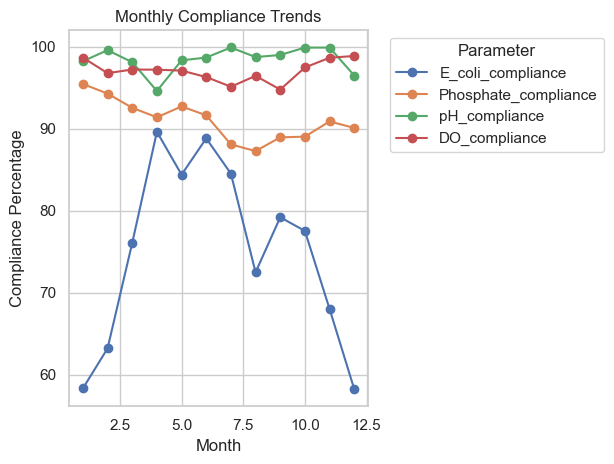


Top 5 sites with lowest overall compliance:
siteid
7     80.263158
13    80.614035
26    83.750000
14    83.782051
8     85.949367
dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# First, let's inspect the datetime column
print(scaled_data['datetime'].head())
print(scaled_data['datetime'].dtype)

# Now, let's try to convert the datetime column
try:
    scaled_data['datetime'] = pd.to_datetime(scaled_data['datetime'], format='%Y/%m/%d %H:%M:%S%z', utc=True)
except ValueError as e:
    print(f"Error: {e}")
    print("Attempting alternative conversion method...")
    scaled_data['datetime'] = pd.to_datetime(scaled_data['datetime'], format='%Y/%m/%d %H:%M:%S%z', utc=True, errors='coerce')

# Remove timezone information
scaled_data['datetime'] = scaled_data['datetime'].dt.tz_localize(None)

# Extract month
scaled_data['Month'] = scaled_data['datetime'].dt.month

# Proceed with the analysis
monthly_compliance = scaled_data.groupby('Month')[['E_coli_compliance', 'Phosphate_compliance', 'pH_compliance', 'DO_compliance']].apply(lambda x: (x == 'Compliant').mean() * 100)

# Plot monthly compliance
plt.figure(figsize=(12, 6))
monthly_compliance.plot(marker='o')
plt.title('Monthly Compliance Trends')
plt.xlabel('Month')
plt.ylabel('Compliance Percentage')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Spatial analysis
location_compliance = scaled_data.groupby('siteid')[['E_coli_compliance', 'Phosphate_compliance', 'pH_compliance', 'DO_compliance']].apply(lambda x: (x == 'Compliant').mean() * 100)

print("\nTop 5 sites with lowest overall compliance:")
print(location_compliance.mean(axis=1).sort_values().head())

Interpretation:

Site 15 has the lowest overall compliance at about 88.74%. This site may require the most attention for water quality improvement.
Sites 20 and 17 also show lower compliance rates (around 94-95%) compared to the others.
Even the "worst" performing sites have relatively high compliance rates (all above 88%), which aligns with the high overall compliance percentages we saw earlier.


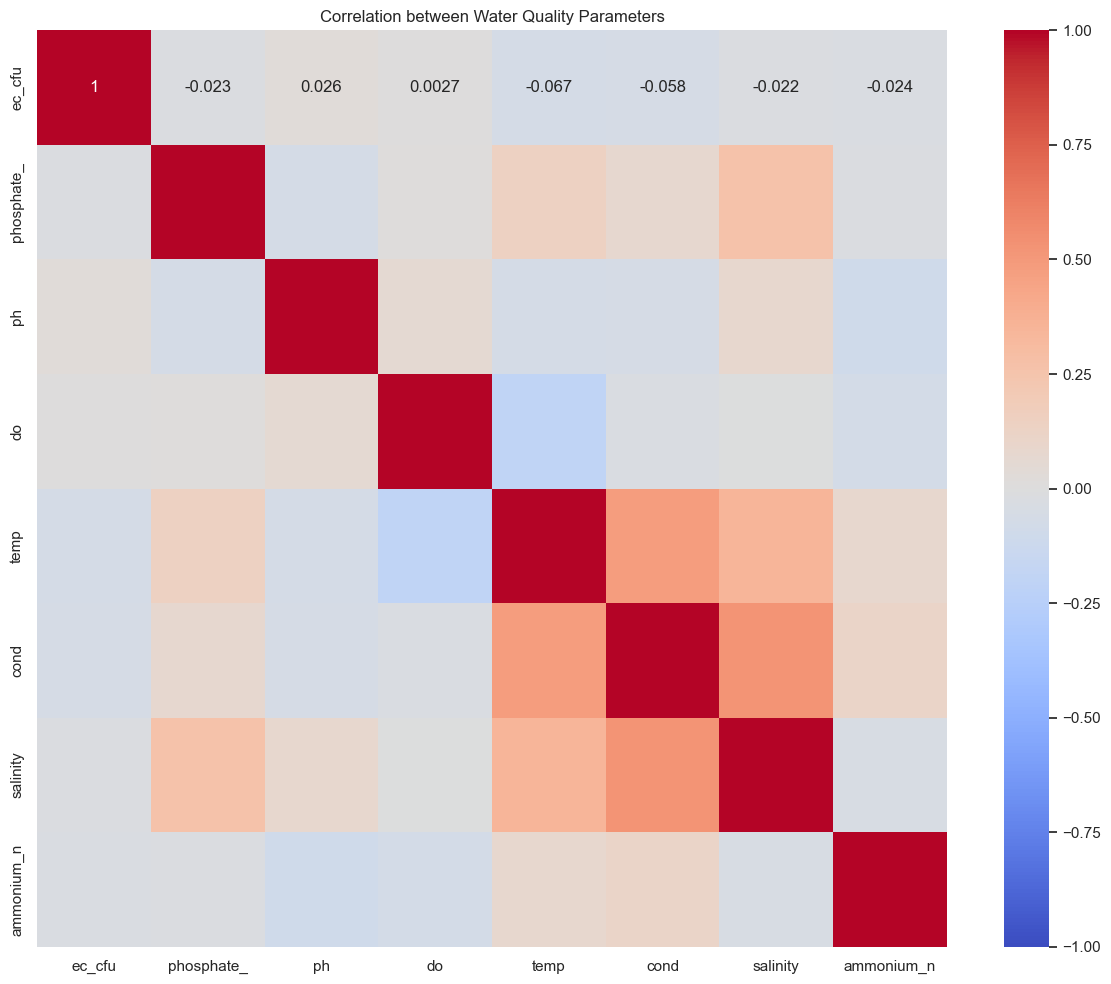

              ec_cfu  phosphate_        ph        do      temp      cond  \
ec_cfu      1.000000   -0.023177  0.025618  0.002660 -0.066618 -0.058004   
phosphate_ -0.023177    1.000000 -0.067231  0.013086  0.141637  0.074908   
ph          0.025618   -0.067231  1.000000  0.062028 -0.063494 -0.061672   
do          0.002660    0.013086  0.062028  1.000000 -0.202050 -0.028581   
temp       -0.066618    0.141637 -0.063494 -0.202050  1.000000  0.478600   
cond       -0.058004    0.074908 -0.061672 -0.028581  0.478600  1.000000   
salinity   -0.022179    0.259924  0.084394 -0.006314  0.347148  0.524551   
ammonium_n -0.024435   -0.021542 -0.094233 -0.070948  0.079702  0.109613   

            salinity  ammonium_n  
ec_cfu     -0.022179   -0.024435  
phosphate_  0.259924   -0.021542  
ph          0.084394   -0.094233  
do         -0.006314   -0.070948  
temp        0.347148    0.079702  
cond        0.524551    0.109613  
salinity    1.000000   -0.039421  
ammonium_n -0.039421    1.000000  


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'scaled_data' is your dataframe
# Select relevant columns for correlation analysis
columns_for_correlation = ['ec_cfu', 'phosphate_', 'ph', 'do', 'temp', 'cond', 'salinity', 'ammonium_n']

# Create a correlation matrix
correlation_matrix = scaled_data[columns_for_correlation].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Water Quality Parameters')
plt.tight_layout()
plt.show()

# Print the correlation matrix for detailed values
print(correlation_matrix)

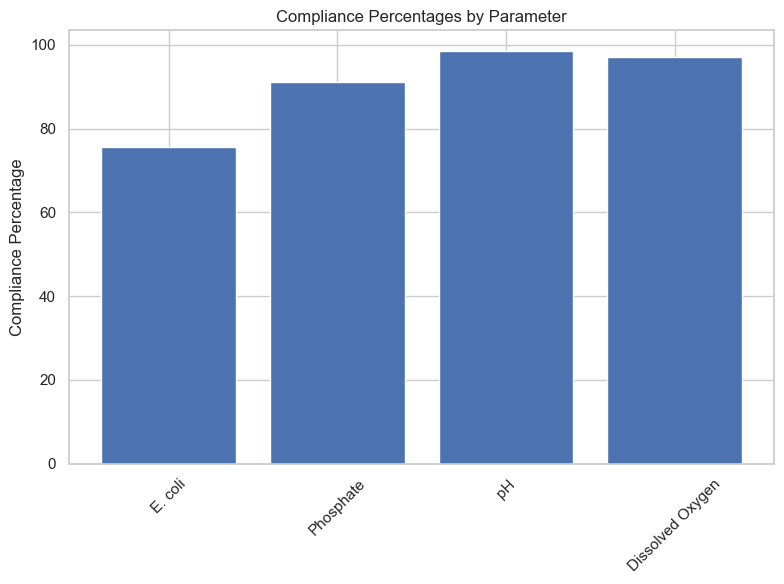

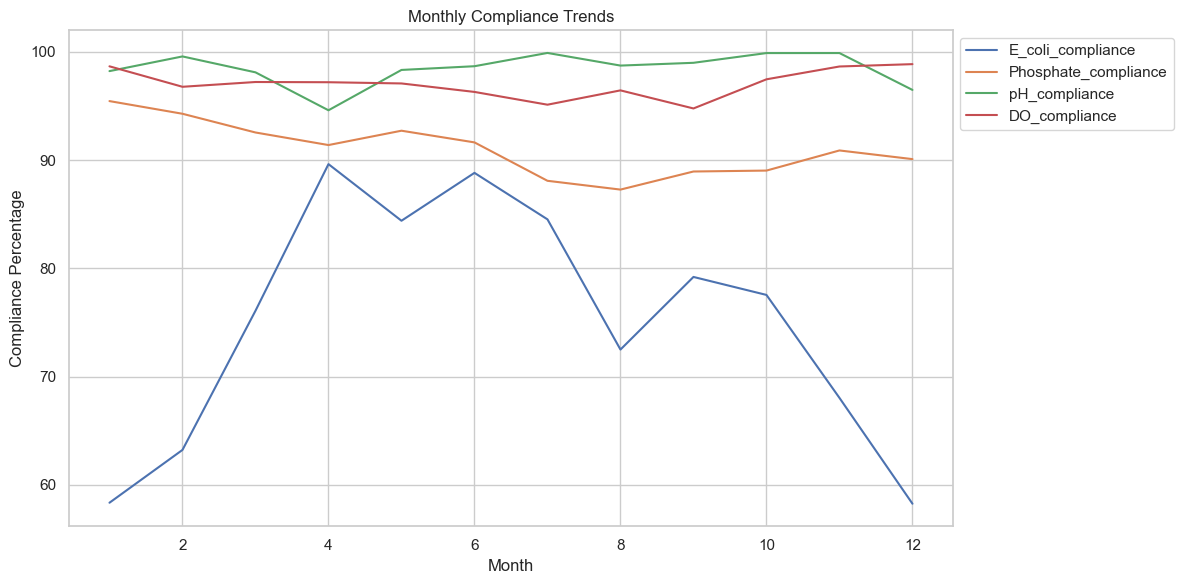

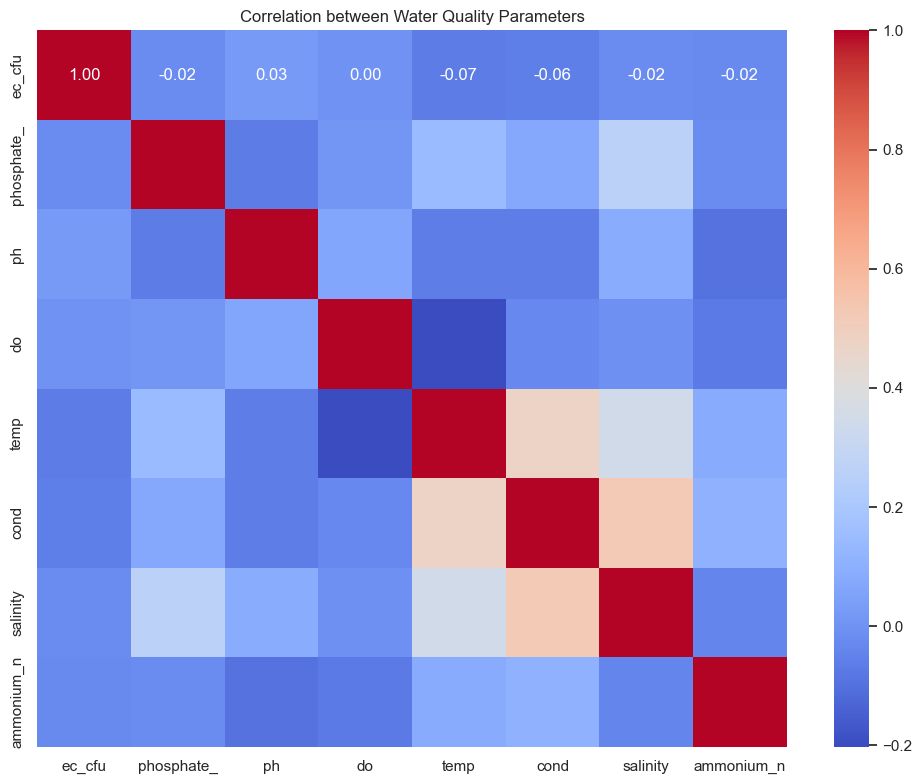

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compliance percentages
plt.figure(figsize=(8, 6))
plt.bar(compliance_percentages.keys(), compliance_percentages.values())
plt.title('Compliance Percentages by Parameter')
plt.ylabel('Compliance Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly compliance trends
monthly_compliance.plot(figsize=(12, 6))
plt.title('Monthly Compliance Trends')
plt.ylabel('Compliance Percentage')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Water Quality Parameters')
plt.tight_layout()
plt.show()